In [111]:
### Edgar Ernesto Cristal Coyoy
### Carné:  22007686

###Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
### Importación de base de datos

dataHP=pd.read_csv('train_hp.csv')
dataHP.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [113]:
### Verificar numero de filas y columnas del Data set

dataHP=pd.read_csv('train_hp.csv')
dataHP.shape

(1460, 81)

Extraemos Columnas con NAN

In [114]:
## Mostrar datos del Data set
dataHP.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [115]:
### Identificación de columnas con valor nulo

cols_con_na=[col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [116]:
### Tipo de datos según datos de cada columna

dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [117]:
### Determinación de columnas con valores Nulos (cantidad de valores nulos por columnas)

prop_nan_per_col=dataHP[cols_con_na].isnull().sum()
prop_nan_per_col

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [118]:
### Determinación de columnas con valores Nulos (Promedio por columnas)

prop_nan_per_col=dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [119]:
### Verificación de columnas que pueden se pueden rescatar para el análisis con menor cantidad de nulos

cols_rescatables=[col for col in dataHP.columns if(dataHP[col].isnull().mean()<=0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

 Complete Case Analysis (CCA)

In [120]:
## Se dejan solo las columnas que tienen casos completos, es decir no tienen ningún nulo.
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 81), (1412, 70))

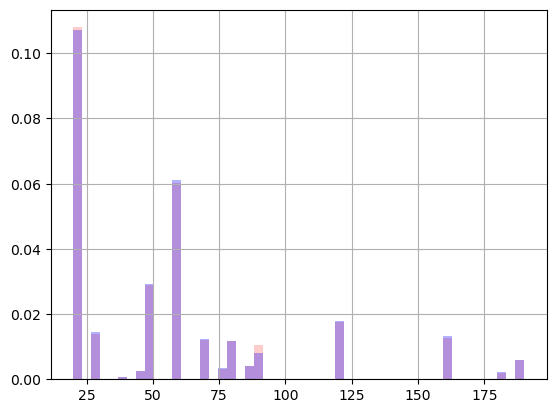

In [121]:
dataHP['MSSubClass'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['MSSubClass'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

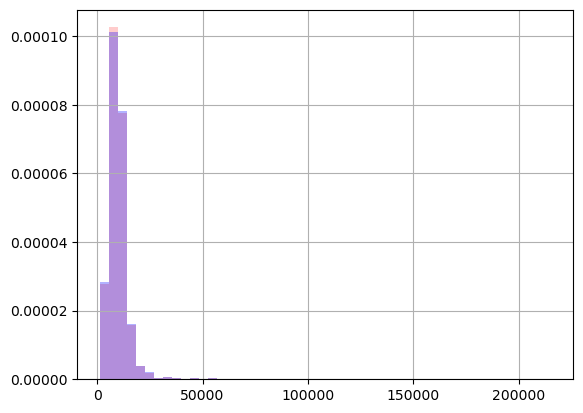

In [122]:
dataHP['LotArea'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['LotArea'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

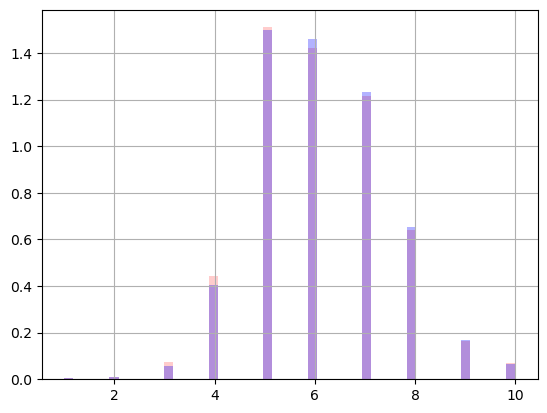

In [123]:
dataHP['OverallQual'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['OverallQual'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

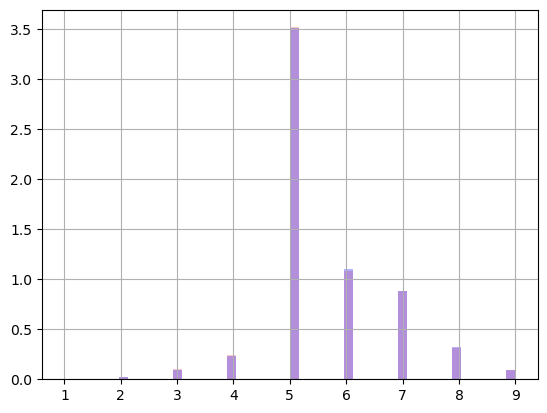

In [124]:
dataHP['OverallCond'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['OverallCond'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

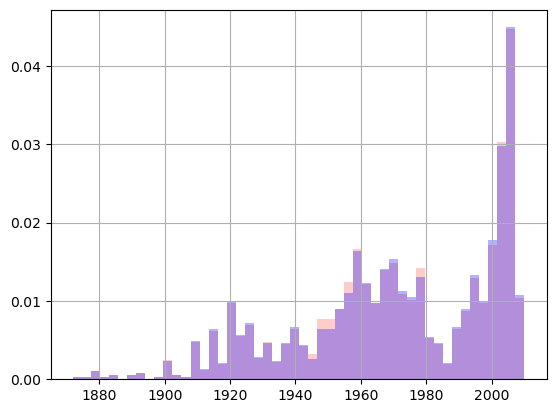

In [125]:
dataHP['YearBuilt'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['YearBuilt'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

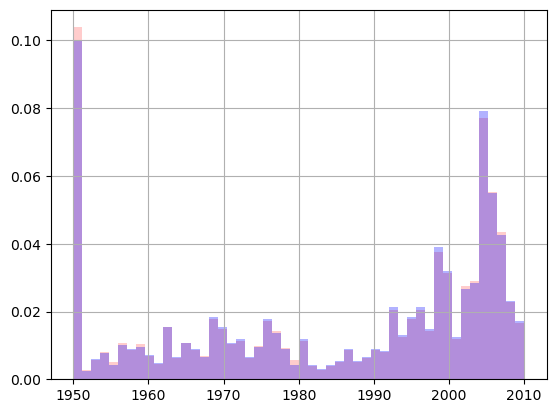

In [126]:
dataHP['YearRemodAdd'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['YearRemodAdd'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

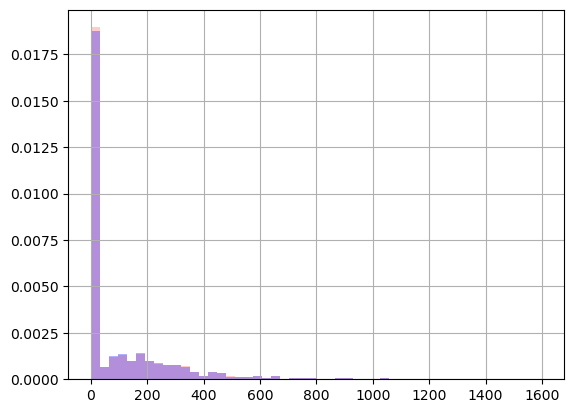

In [127]:
dataHP['MasVnrArea'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['MasVnrArea'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

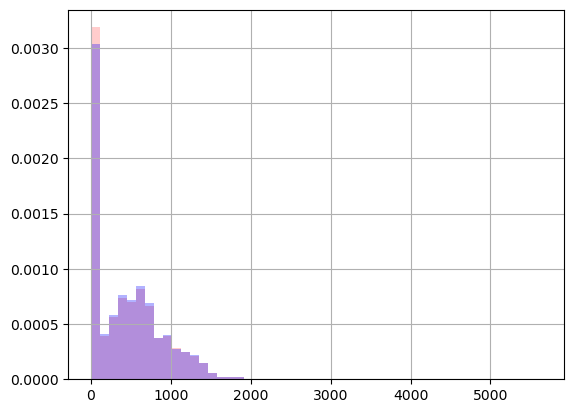

In [128]:
dataHP['BsmtFinSF1'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['BsmtFinSF1'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

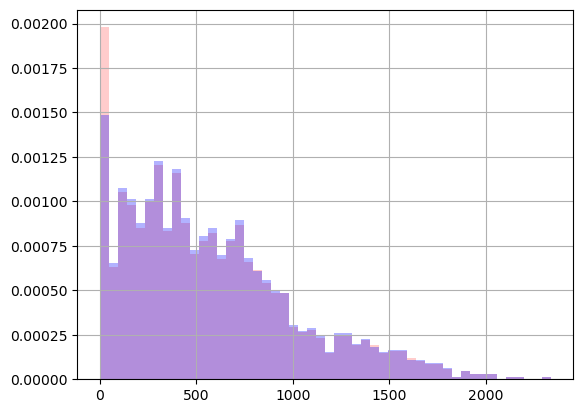

In [129]:
dataHP['BsmtUnfSF'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['BsmtUnfSF'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

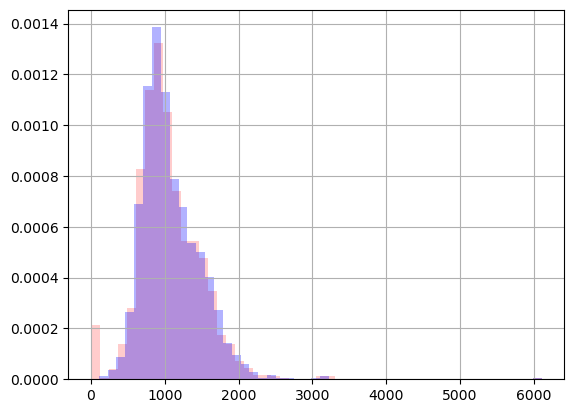

In [130]:
dataHP['TotalBsmtSF'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['TotalBsmtSF'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

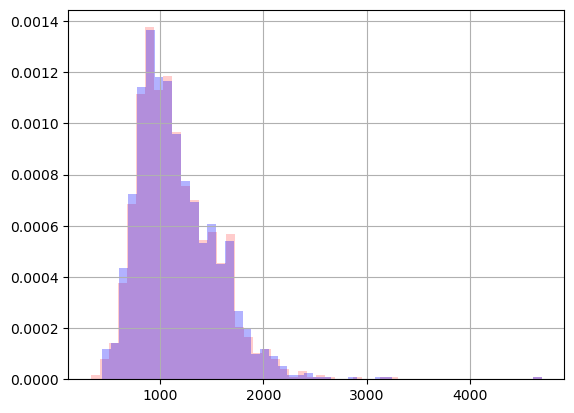

In [131]:
dataHP['1stFlrSF'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['1stFlrSF'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

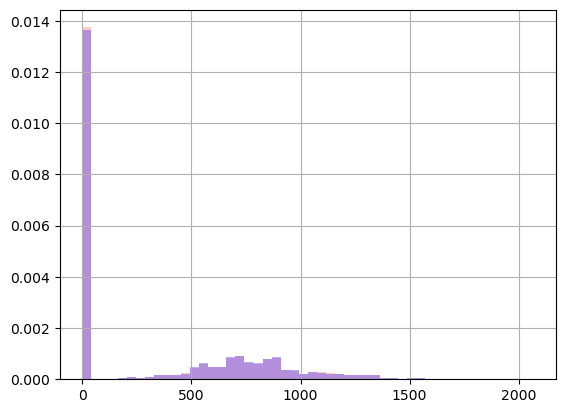

In [132]:
dataHP['2ndFlrSF'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['2ndFlrSF'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

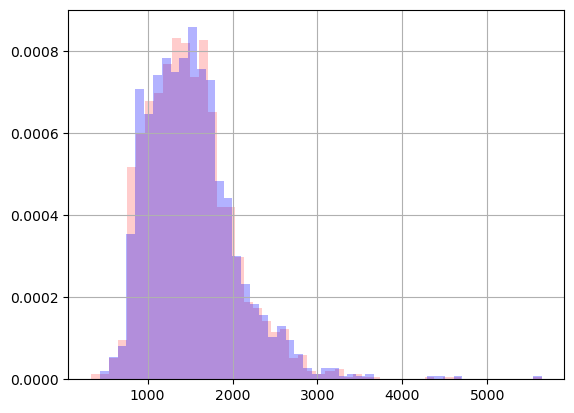

In [133]:
dataHP['GrLivArea'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['GrLivArea'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

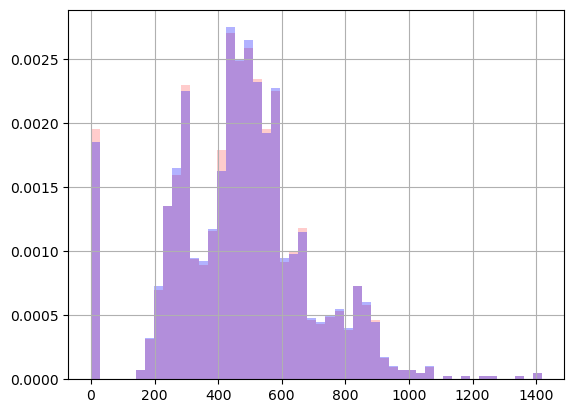

In [134]:
dataHP['GarageArea'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['GarageArea'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

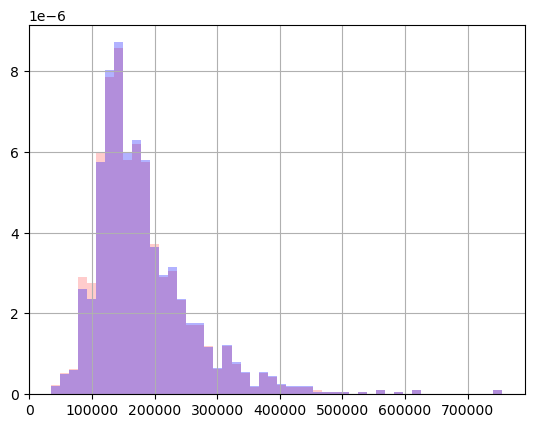

In [135]:
dataHP['SalePrice'].hist(bins=50, density=True, color='red',alpha=0.2)
data_HP_noNAN['SalePrice'].hist(bins=50, density=True, color='blue',alpha=0.3)
plt.show()

In [136]:
### Verificación de 3 columnas del DATA SET
dataHP1=dataHP[['MSSubClass','LotFrontage','LotArea','SalePrice']]
dataHP1.head()

MSSubClass  LotFrontage  LotArea  SalePrice
0          60         65.0     8450     208500
1          20         80.0     9600     181500
2          60         68.0    11250     223500
3          70         60.0     9550     140000
4          60         84.0    14260     250000

In [137]:
media=dataHP['LotFrontage'].mean()
mediana=dataHP['LotFrontage'].median()
print(f"Media:{media}")
print(f"Mediana:{mediana}")

Media:70.04995836802665
Mediana:69.0


In [138]:
dataHP['LotFrontage_Mean']=np.round(dataHP['LotFrontage'].fillna(media))
dataHP['LotFrontage_Median']=np.round(dataHP['LotFrontage'].fillna(mediana))

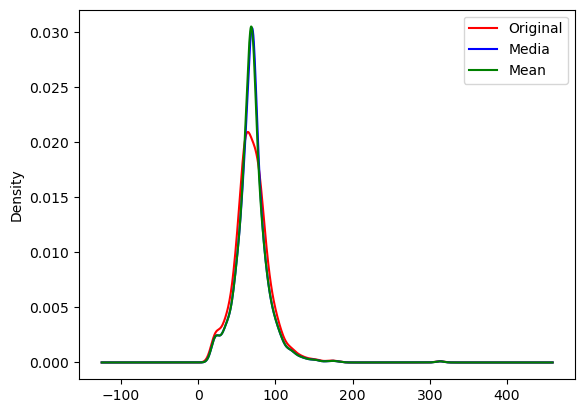

In [139]:
### Análisis de la variable LOTFRONTAGE

fig=plt.figure()
ax=fig.add_subplot(111)

dataHP['LotFrontage'].plot.density(color='red',label='Original')
dataHP['LotFrontage_Mean'].plot.density(color='blue',label='Media')
dataHP['LotFrontage_Median'].plot.density(color='green',label='Mean')
ax.legend()

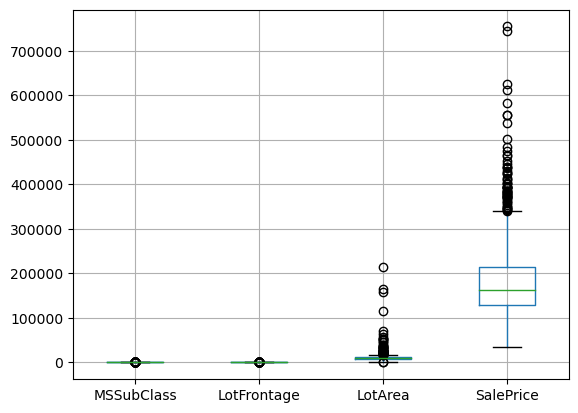

In [140]:
dataHP[['MSSubClass','LotFrontage','LotArea','SalePrice']].boxplot()
plt.show()

IMPUTACIÓN CATEGORICA

In [141]:
dataset_cat_missing=dataHP[['MSSubClass','GarageQual','BsmtQual','FireplaceQu','LotFrontage','LotArea','GarageArea','SalePrice']]
dataset_cat_missing.head()

MSSubClass GarageQual BsmtQual FireplaceQu  LotFrontage  LotArea  \
0          60         TA       Gd         NaN         65.0     8450   
1          20         TA       Gd          TA         80.0     9600   
2          60         TA       Gd          TA         68.0    11250   
3          70         TA       TA          Gd         60.0     9550   
4          60         TA       Gd          TA         84.0    14260   

   GarageArea  SalePrice  
0         548     208500  
1         460     181500  
2         608     223500  
3         642     140000  
4         836     250000

In [142]:
dataset_cat_missing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [143]:
dataset_cat_missing['GarageQual'].value_counts()/len(dataset_cat_missing)

TA    0.897945
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64

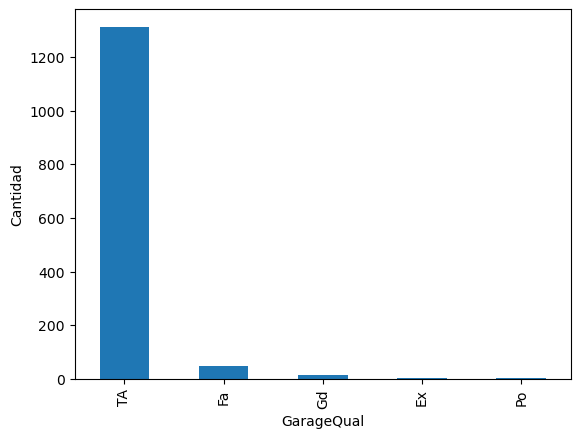

In [144]:
dataset_cat_missing['GarageQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageQual")
plt.show()

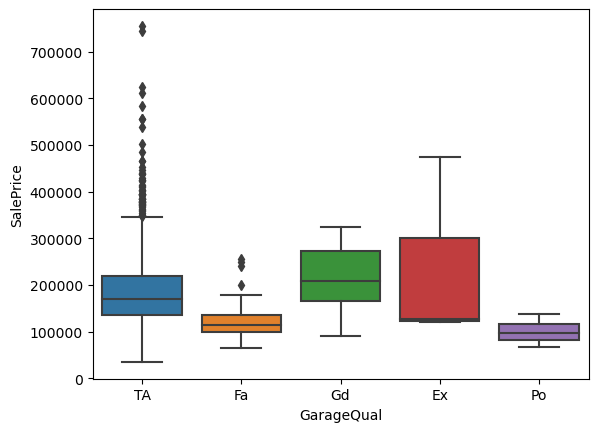

In [145]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['GarageQual'], y=dataset_cat_missing['SalePrice'])
plt.show()

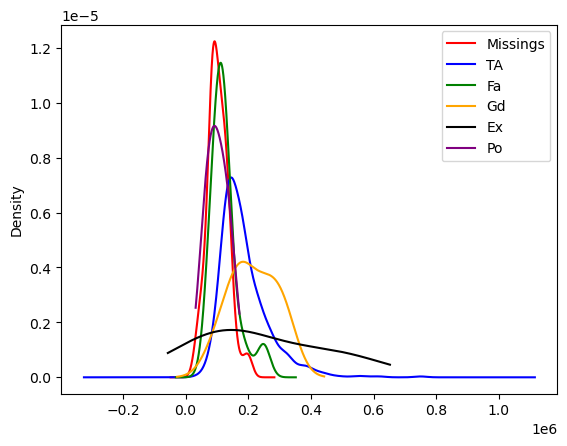

In [146]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['GarageQual'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='TA']['SalePrice'].plot(kind="kde",color="blue",label="TA")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Fa']['SalePrice'].plot(kind="kde",color="green",label="Fa")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Gd']['SalePrice'].plot(kind="kde",color="orange",label="Gd")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Ex']['SalePrice'].plot(kind="kde",color="Black",label="Ex")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Po']['SalePrice'].plot(kind="kde",color="Purple",label="Po")
ax.legend()
plt.show()

In [147]:
### Imputación de variable categorica.

### dataset_cat_missing['GarageQual'].fillna('Fa',inplace=True)

In [148]:
dataset_cat_missing['GarageQual'].value_counts()/len(dataset_cat_missing)

TA    0.897945
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64

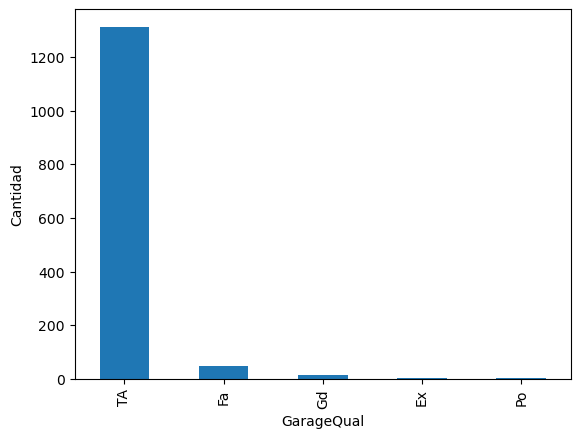

In [149]:
dataset_cat_missing['GarageQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageQual")
plt.show()

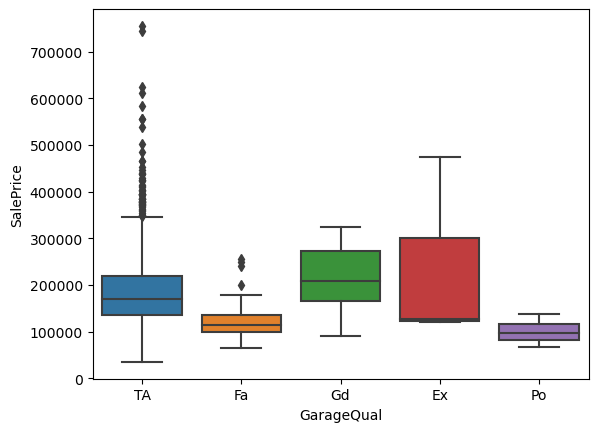

In [150]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['GarageQual'], y=dataset_cat_missing['SalePrice'])
plt.show()

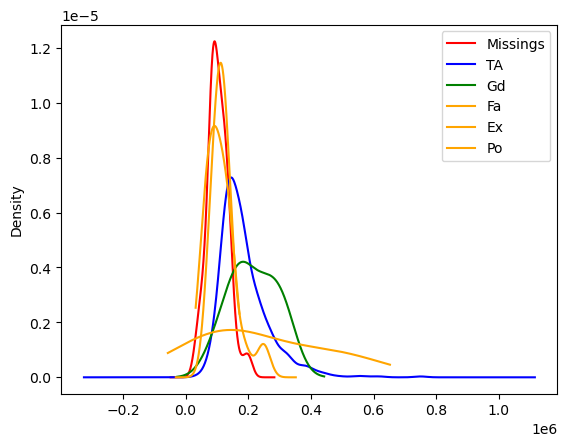

In [151]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['GarageQual'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='TA']['SalePrice'].plot(kind="kde",color="blue",label="TA")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Gd']['SalePrice'].plot(kind="kde",color="green",label="Gd")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Fa']['SalePrice'].plot(kind="kde",color="orange",label="Fa")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Ex']['SalePrice'].plot(kind="kde",color="orange",label="Ex")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Po']['SalePrice'].plot(kind="kde",color="orange",label="Po")
ax.legend()
plt.show()

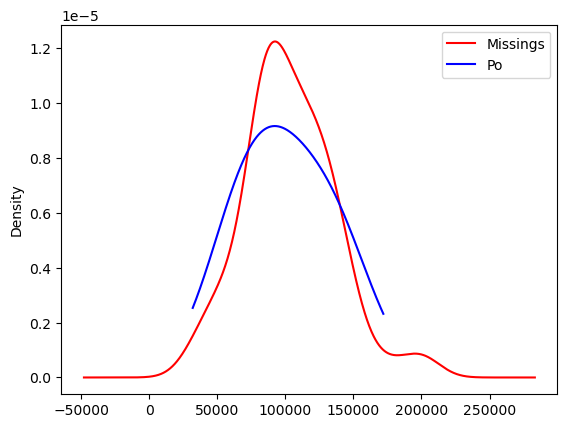

In [152]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['GarageQual'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageQual']=='Po']['SalePrice'].plot(kind="kde",color="Blue",label="Po")
ax.legend()
plt.show()

In [153]:
### Imputación de variable categorica.

### dataset_cat_missing['GarageQual'].fillna('Po',inplace=True)

Codificación de Variables Categóricas

In [154]:
def getCategoryVars(dataset):
    cat_colnames=[]
    colnames=dataset.columns
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

In [155]:
cat_cols=getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [156]:
cat_cols.append('SalePrice')

In [157]:
dataset_categories=dataHP[cat_cols]
dataset_categories.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageFinish GarageQual GarageCond PavedDrive  \
0      CollgCr       Norm  ...          RFn         TA         TA          Y   
1      Veenker      Feedr  ...          RFn         TA         TA          Y   
2      CollgCr       Norm  ...          RFn         TA         TA          Y   
3      Crawfor       Norm  ...          Unf         TA         TA          Y   
4      NoRidge       Norm  ...          RFn         TA         TA          Y   

  PoolQC Fence MiscFeature SaleType SaleCondition SalePrice  
0    NaN   NaN         NaN       WD        Normal    208500  
1    NaN   NaN         NaN       WD        Normal    181500  
2    NaN   NaN         NaN       WD        Normal    223500  
3    NaN   NaN         NaN       WD       Abnorml    140000  
4    NaN   NaN         NaN       WD        Normal    250000  

[5 rows x 44 columns]

In [158]:
dataset_categories['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [159]:
pd.get_dummies(dataset_categories['GarageQual'])

Ex  Fa  Gd  Po  TA
0      0   0   0   0   1
1      0   0   0   0   1
2      0   0   0   0   1
3      0   0   0   0   1
4      0   0   0   0   1
...   ..  ..  ..  ..  ..
1455   0   0   0   0   1
1456   0   0   0   0   1
1457   0   0   0   0   1
1458   0   0   0   0   1
1459   0   0   0   0   1

[1460 rows x 5 columns]

In [160]:
dataset_categories.shape

(1460, 44)

In [161]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.shape

(1460, 253)

In [162]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 253 entries, SalePrice to SaleCondition_Partial
dtypes: int64(1), uint8(252)
memory usage: 370.8 KB


Frecuency Encoding

In [163]:
dataset_categories['GarageQual'].value_counts().sort_values(ascending=False)

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

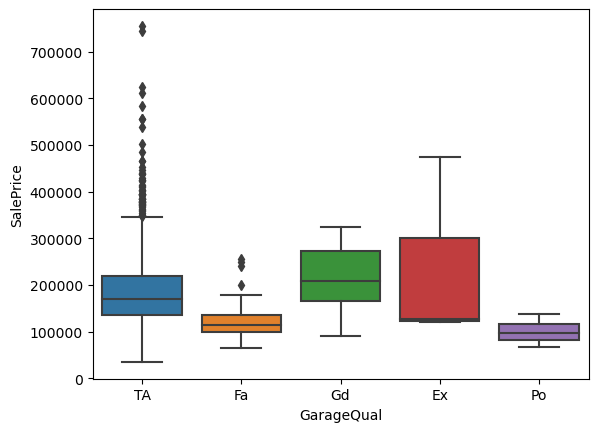

In [164]:
sns.boxplot(x=dataset_categories['GarageQual'], y=dataset_categories['SalePrice'])
plt.show()

In [165]:
GarageQual_freq_mapper=(dataset_categories['GarageQual'].value_counts().sort_values(ascending=False)).to_dict()
GarageQual_freq_mapper

{'TA': 1311, 'Fa': 48, 'Gd': 14, 'Ex': 3, 'Po': 3}

In [166]:
dataset_categories['GarageQual_code']=dataset_categories['GarageQual'].map(GarageQual_freq_mapper)
dataset_categories[['GarageQual','GarageQual_code']]

C:\Users\ecris\AppData\Local\Temp\ipykernel_34072\3454494255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['GarageQual_code']=dataset_categories['GarageQual'].map(GarageQual_freq_mapper)


GarageQual  GarageQual_code
0            TA           1311.0
1            TA           1311.0
2            TA           1311.0
3            TA           1311.0
4            TA           1311.0
...         ...              ...
1455         TA           1311.0
1456         TA           1311.0
1457         TA           1311.0
1458         TA           1311.0
1459         TA           1311.0

[1460 rows x 2 columns]

In [167]:
###OUTLIERS

dataset=dataHP
continuas=[]
discretas=[]
for col in dataset.columns:
    if((dataset[col].dtype=='int64')or(dataset[col].dtype=='float64')):
        print(col)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
LotFrontage_Mean
LotFrontage_Median


In [168]:
dataset.dtypes

Id                      int64
MSSubClass              int64
MSZoning               object
LotFrontage           float64
LotArea                 int64
                       ...   
SaleType               object
SaleCondition          object
SalePrice               int64
LotFrontage_Mean      float64
LotFrontage_Median    float64
Length: 83, dtype: object

In [169]:
dataset=dataHP

def getColumnTypes(dataset):
###Descripción: Esta función extrae el tipo de dominio de las columnas de un dataset.
###Entradas: Pandas Dataframe
###Salida: Tupla con arreglo que contiene nombres de las columnas

    continuas=[]
    discretas=[]
    categoricas=[]
    for col in dataset.columns:
        if((dataset[col].dtype=='int64')or(dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas

In [170]:
continuas, discretas, categoricas=getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'LotFrontage_Mean', 'LotFrontage_Median']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepl

In [171]:
import scipy.stats as stats

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q Plot')

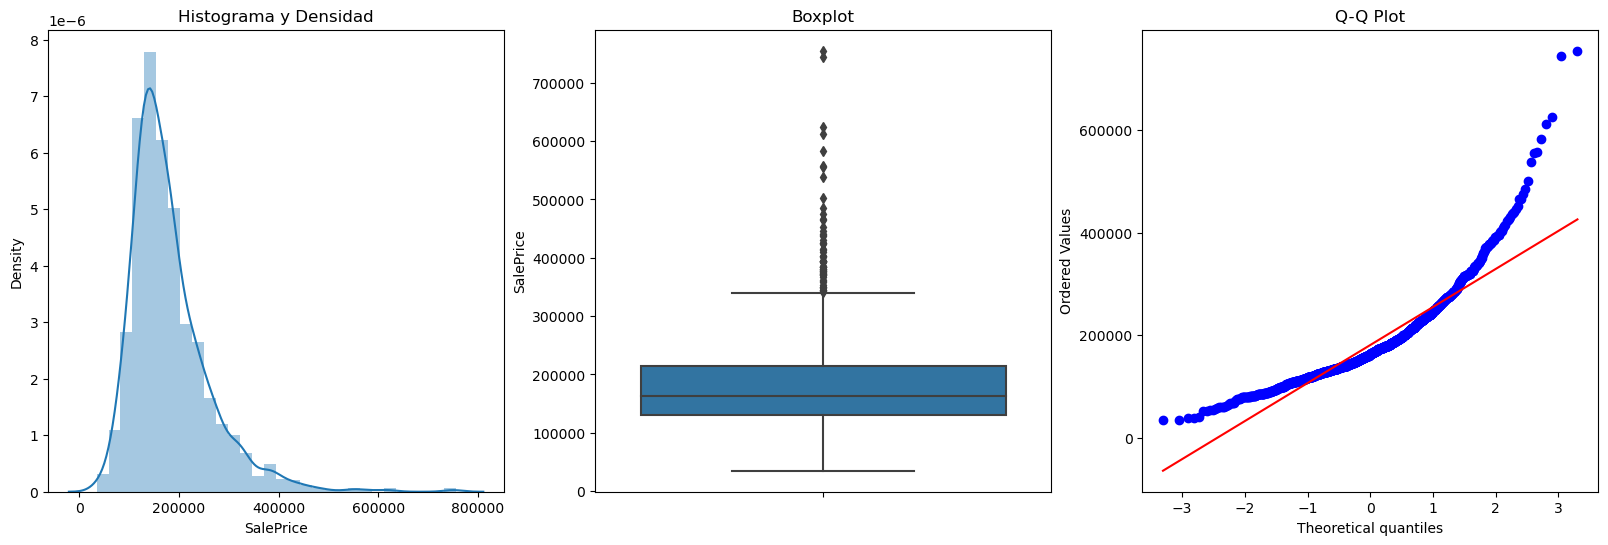

In [172]:
###Descripción: Muestra las gráficas de Distribución, Boxplot y QQ-Plot para detectar Outliers
###Imput: dataset -> pandas dataframe, col>string con lnombre de la columna
### Output: visualización de plots

dataset=dataHP
col ='SalePrice'
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dataset[col],bins=30)
plt.title("Histograma y Densidad")

plt.subplot(1,3,2)
sns.boxplot(y=dataset[col])
plt.title("Boxplot")


plt.subplot(1,3,3)
stats.probplot(dataset[col],dist="norm",plot=plt)
plt.title("Q-Q Plot")

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q Plot')

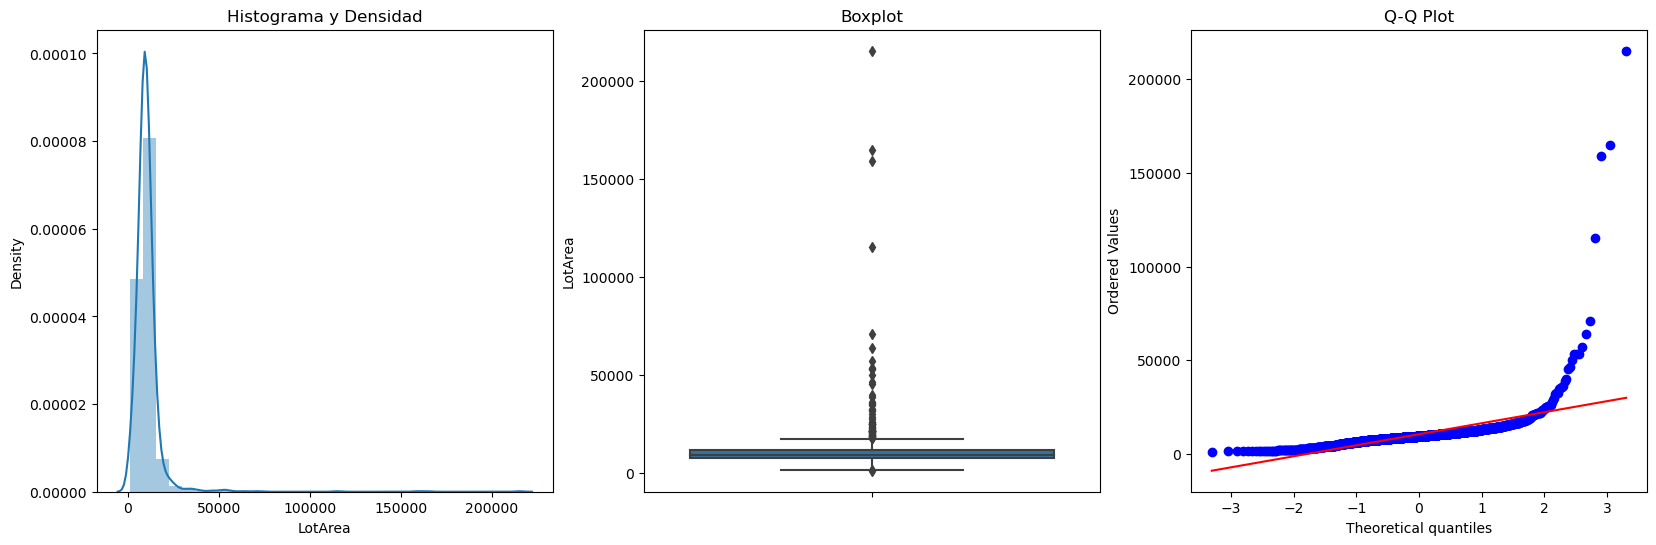

In [173]:
dataset=dataHP
col ='LotArea'
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dataset[col],bins=30)
plt.title("Histograma y Densidad")

plt.subplot(1,3,2)
sns.boxplot(y=dataset[col])
plt.title("Boxplot")


plt.subplot(1,3,3)
stats.probplot(dataset[col],dist="norm",plot=plt)
plt.title("Q-Q Plot")

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q Plot')

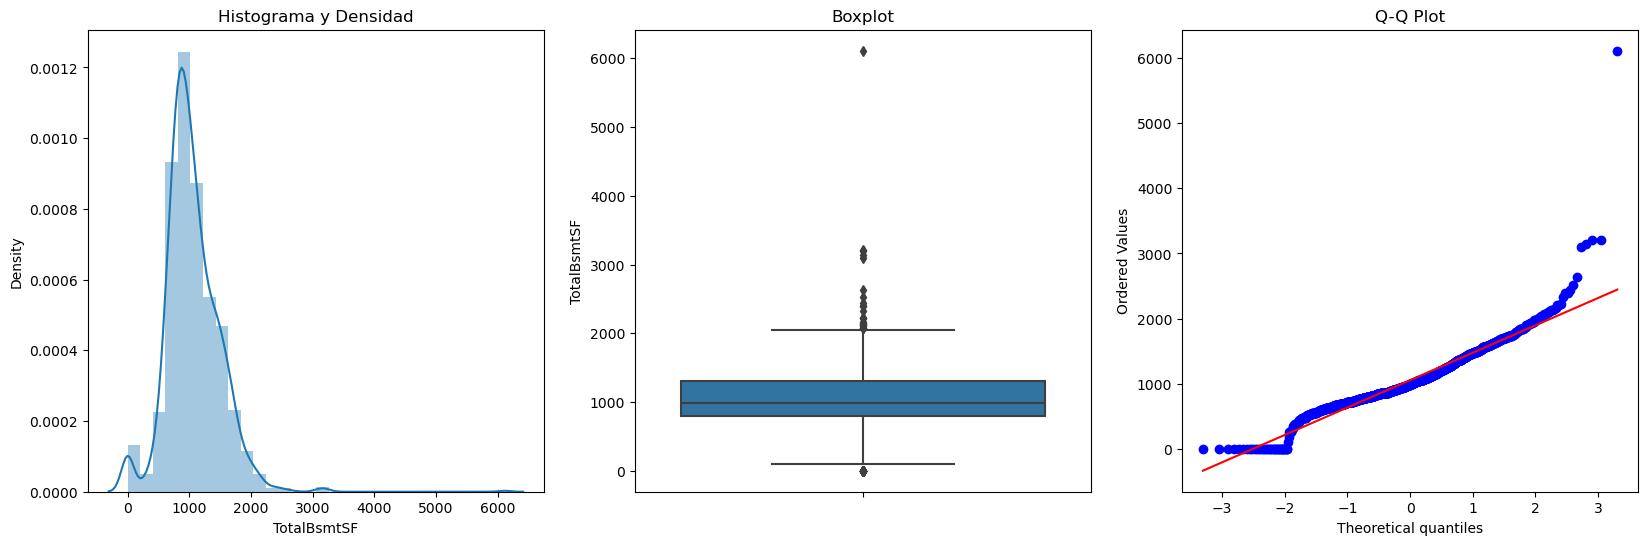

In [174]:
dataset=dataHP
col ='TotalBsmtSF'
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dataset[col],bins=30)
plt.title("Histograma y Densidad")

plt.subplot(1,3,2)
sns.boxplot(y=dataset[col])
plt.title("Boxplot")


plt.subplot(1,3,3)
stats.probplot(dataset[col],dist="norm",plot=plt)
plt.title("Q-Q Plot")

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q Plot')

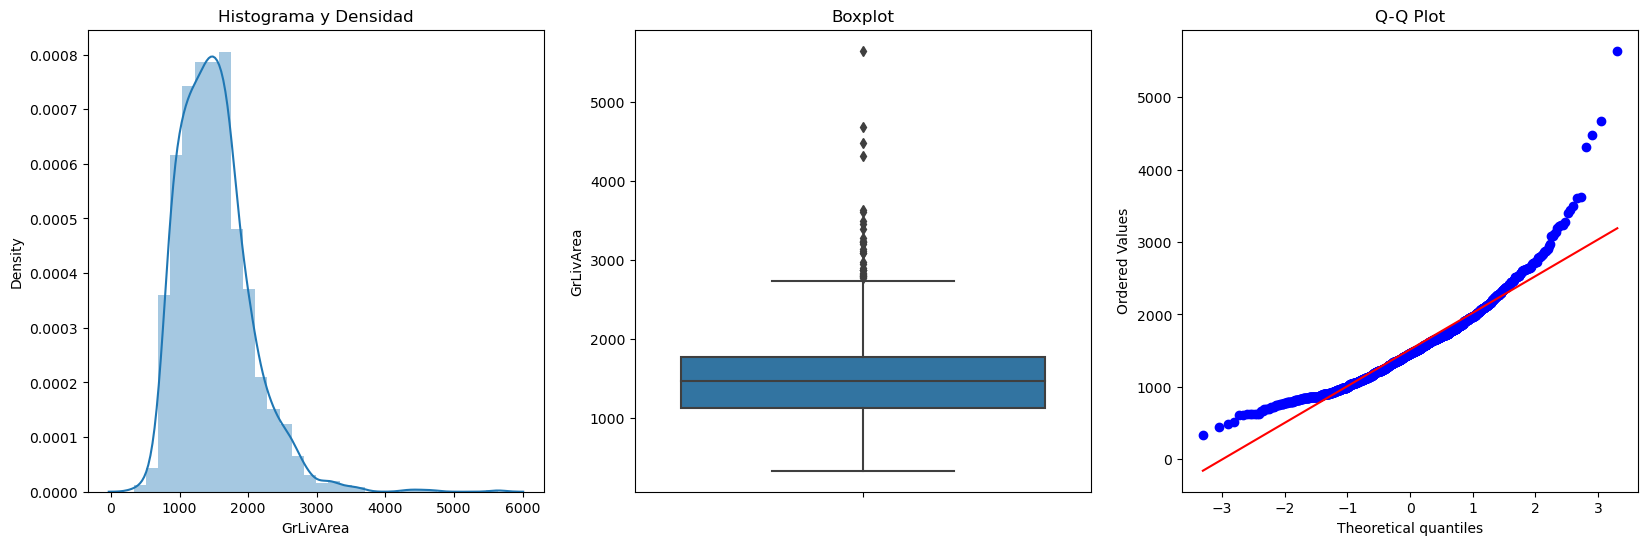

In [175]:
dataset=dataHP
col ='GrLivArea'
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dataset[col],bins=30)
plt.title("Histograma y Densidad")

plt.subplot(1,3,2)
sns.boxplot(y=dataset[col])
plt.title("Boxplot")


plt.subplot(1,3,3)
stats.probplot(dataset[col],dist="norm",plot=plt)
plt.title("Q-Q Plot")

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q Plot')

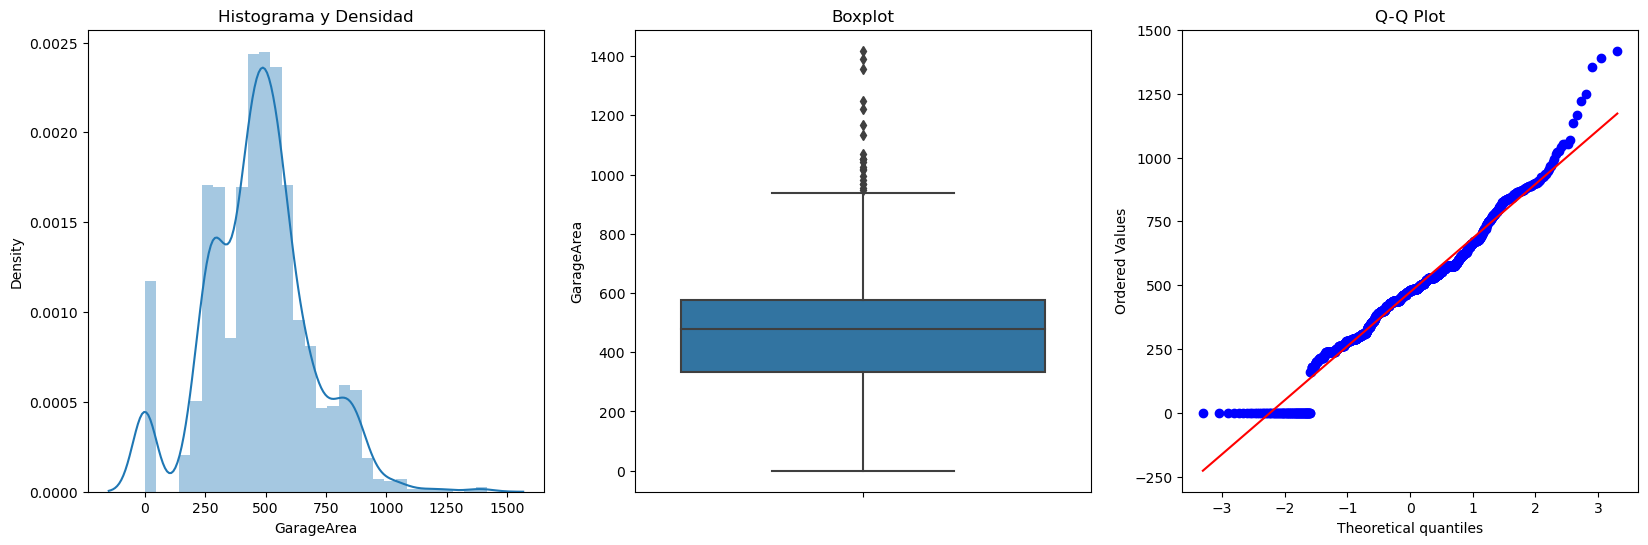

In [176]:
dataset=dataHP
col ='GarageArea'
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dataset[col],bins=30)
plt.title("Histograma y Densidad")

plt.subplot(1,3,2)
sns.boxplot(y=dataset[col])
plt.title("Boxplot")


plt.subplot(1,3,3)
stats.probplot(dataset[col],dist="norm",plot=plt)
plt.title("Q-Q Plot")

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q Plot')

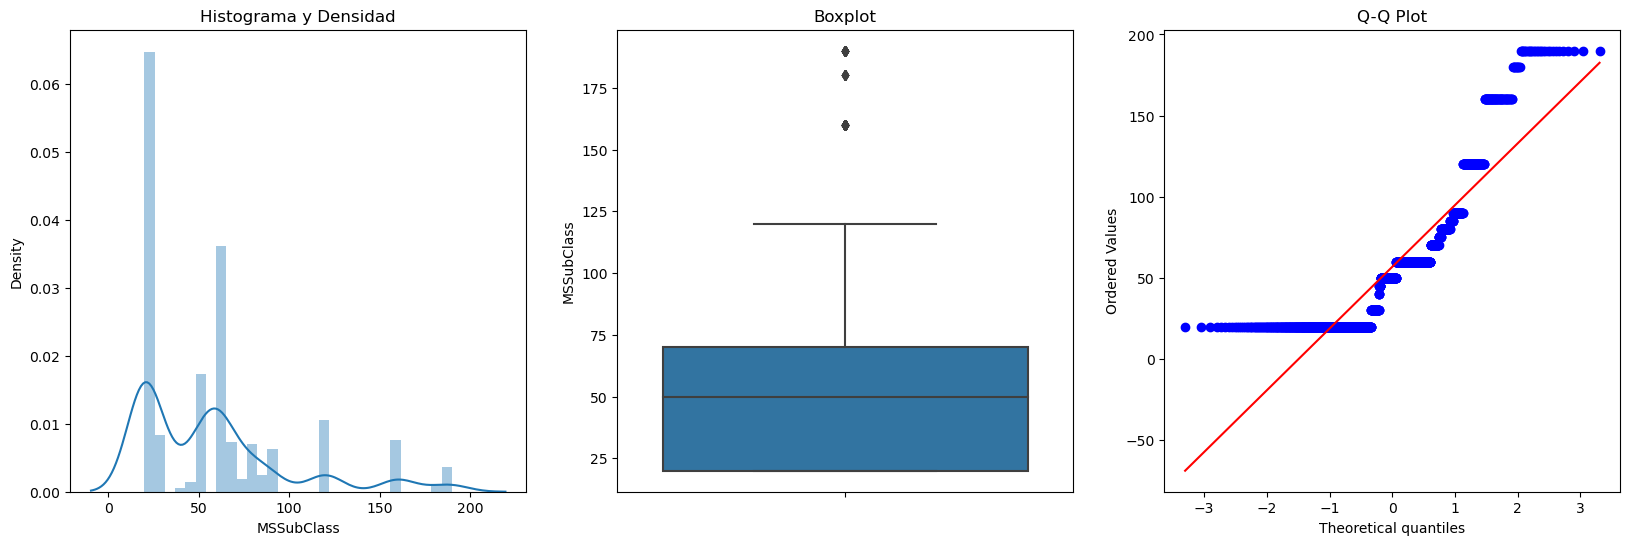

In [177]:
dataset=dataHP
col ='MSSubClass'
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dataset[col],bins=30)
plt.title("Histograma y Densidad")

plt.subplot(1,3,2)
sns.boxplot(y=dataset[col])
plt.title("Boxplot")


plt.subplot(1,3,3)
stats.probplot(dataset[col],dist="norm",plot=plt)
plt.title("Q-Q Plot")

In [178]:
def plotDistBoxQQ(dataset,col):

###descripcion: Muestra las graficas de Distribucion, Boxplot y QQ-Plot para detectar Outliers imput:dataset-> pandas datagrame, col ->string con nombre de columna output: visualización de plots.

    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(dataset[col],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")


    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Q-Q Plot")

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: could not convert string to float: 'RL'

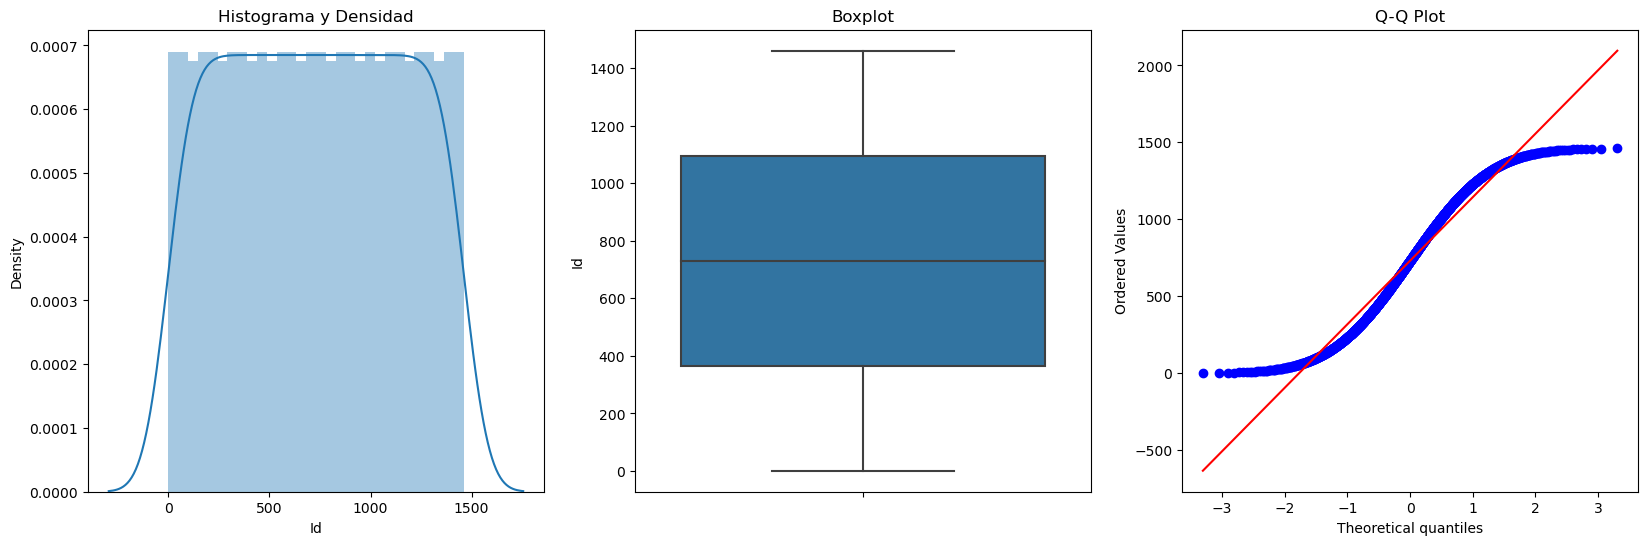

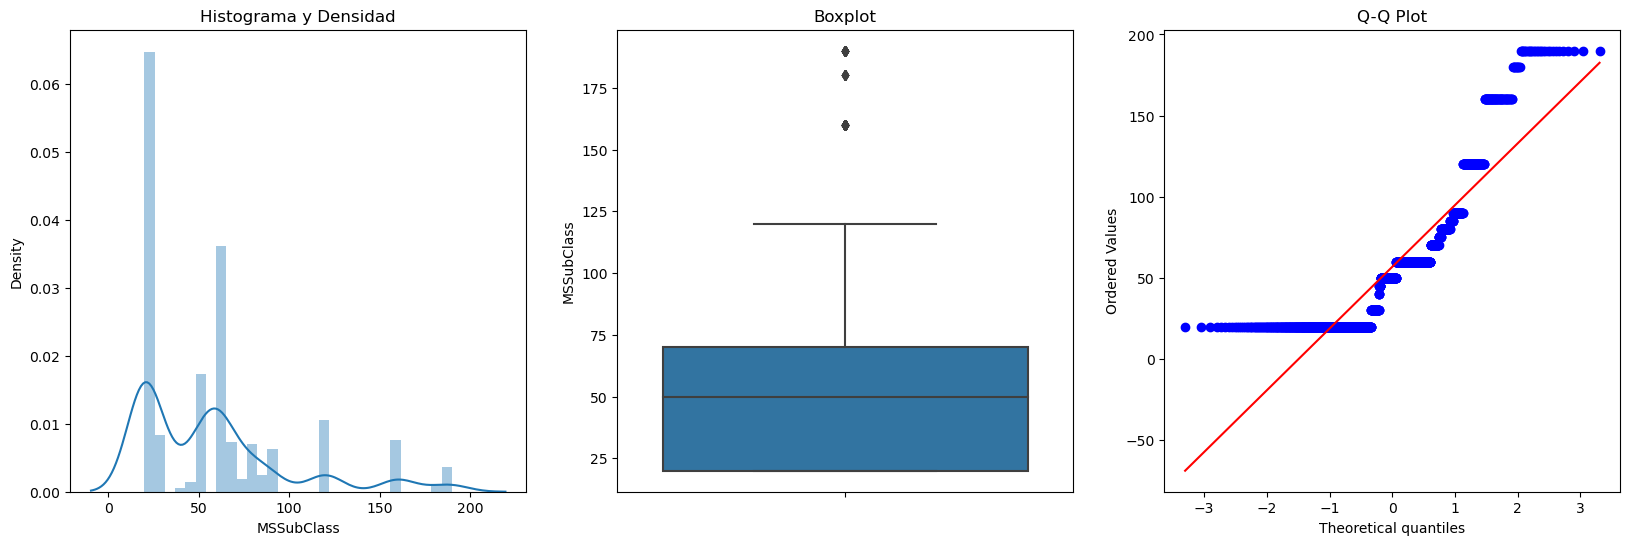

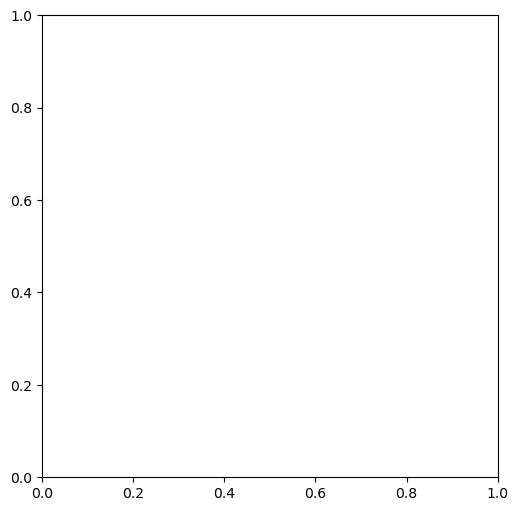

In [179]:
for col in dataHP.columns:
    plotDistBoxQQ(dataHP,col)

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

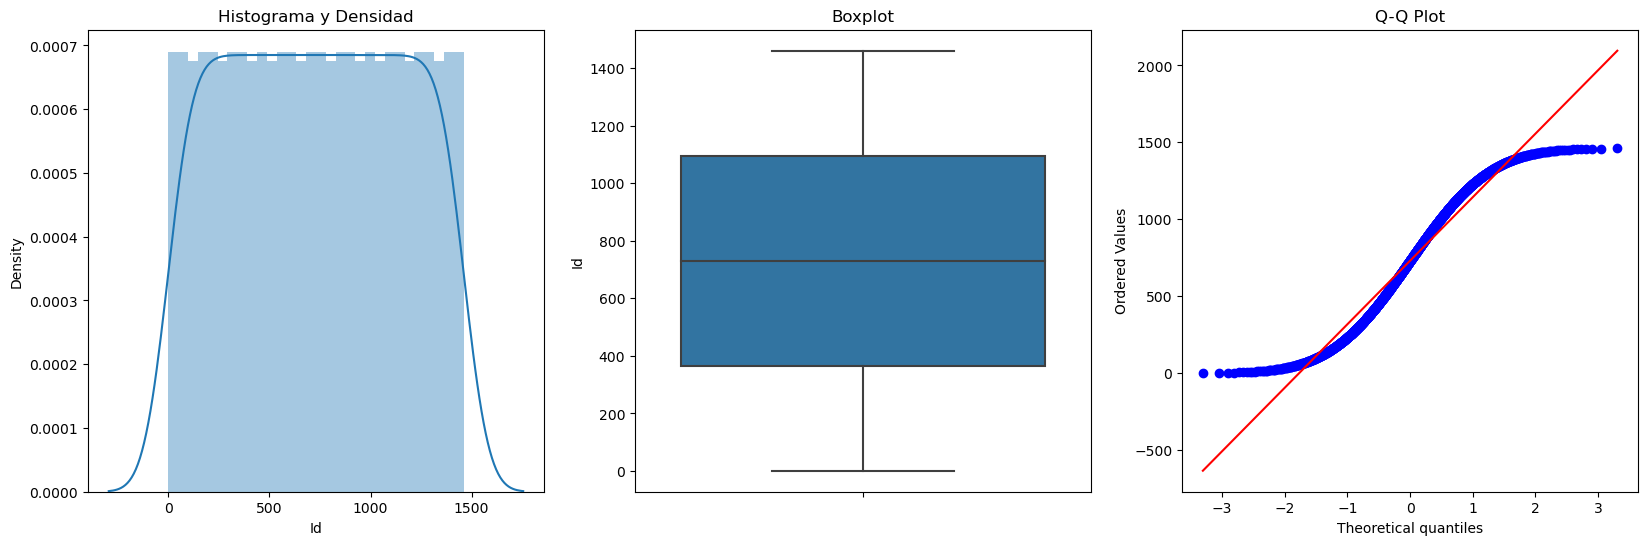

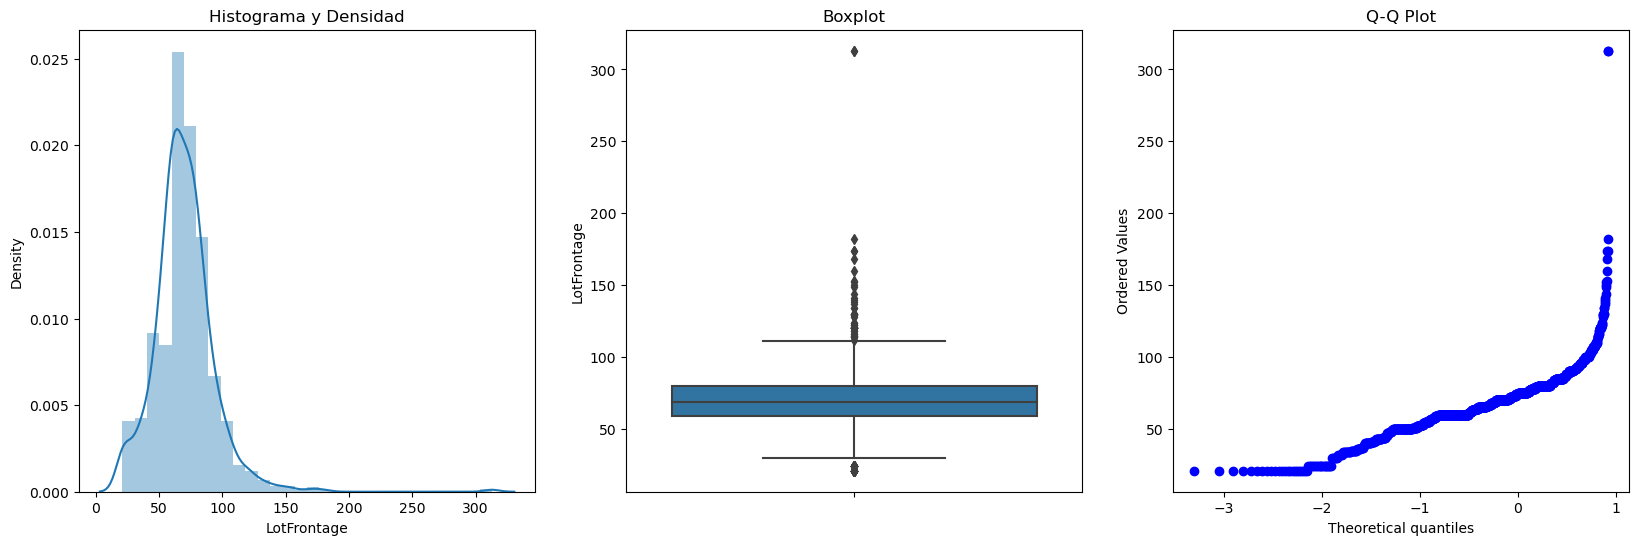

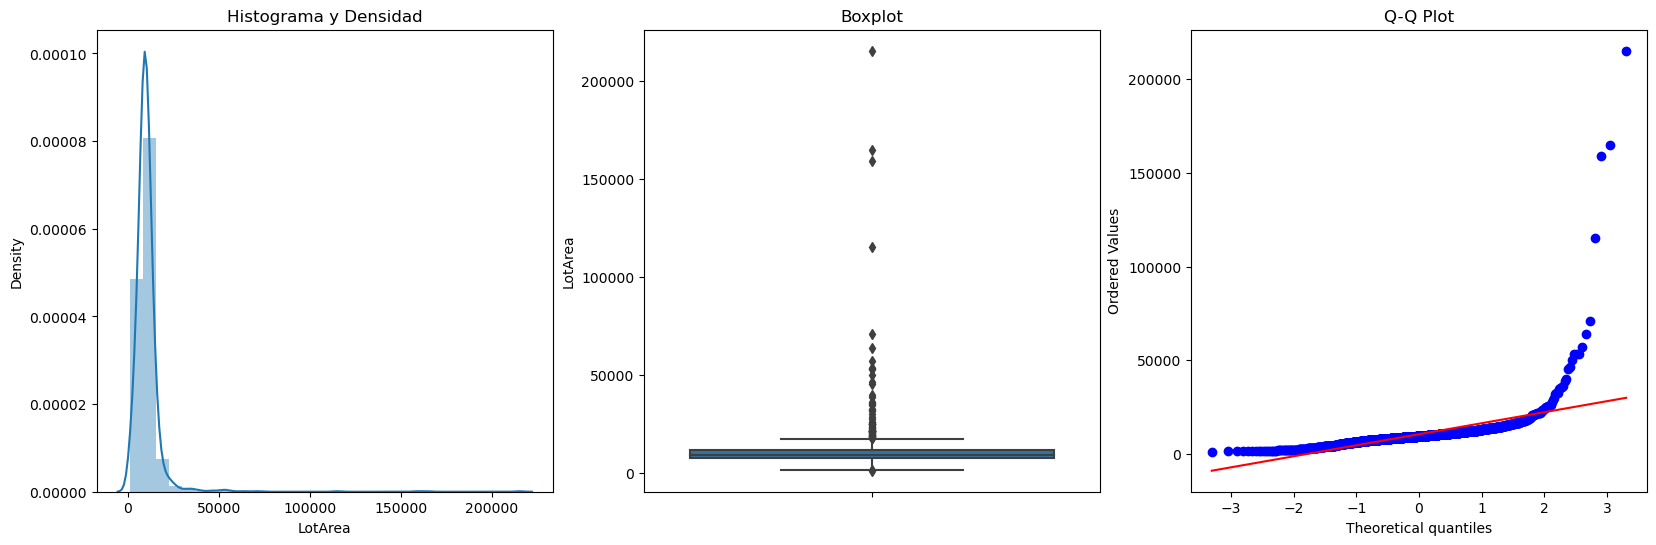

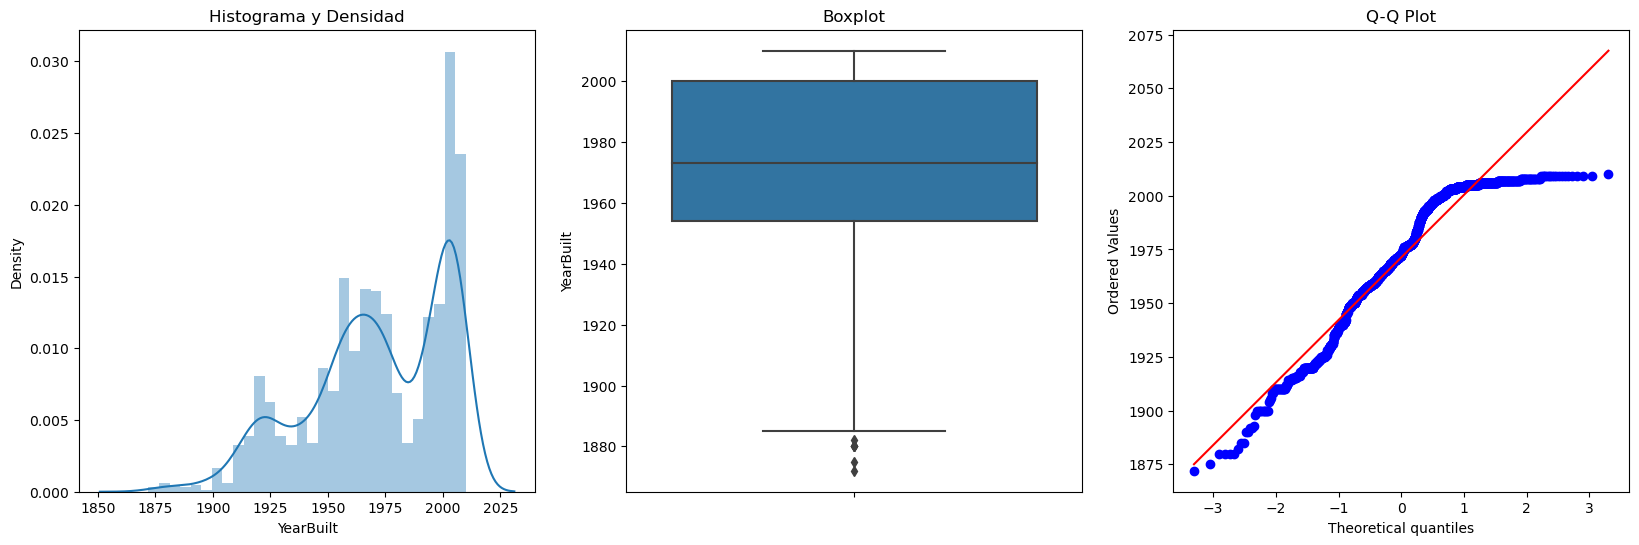

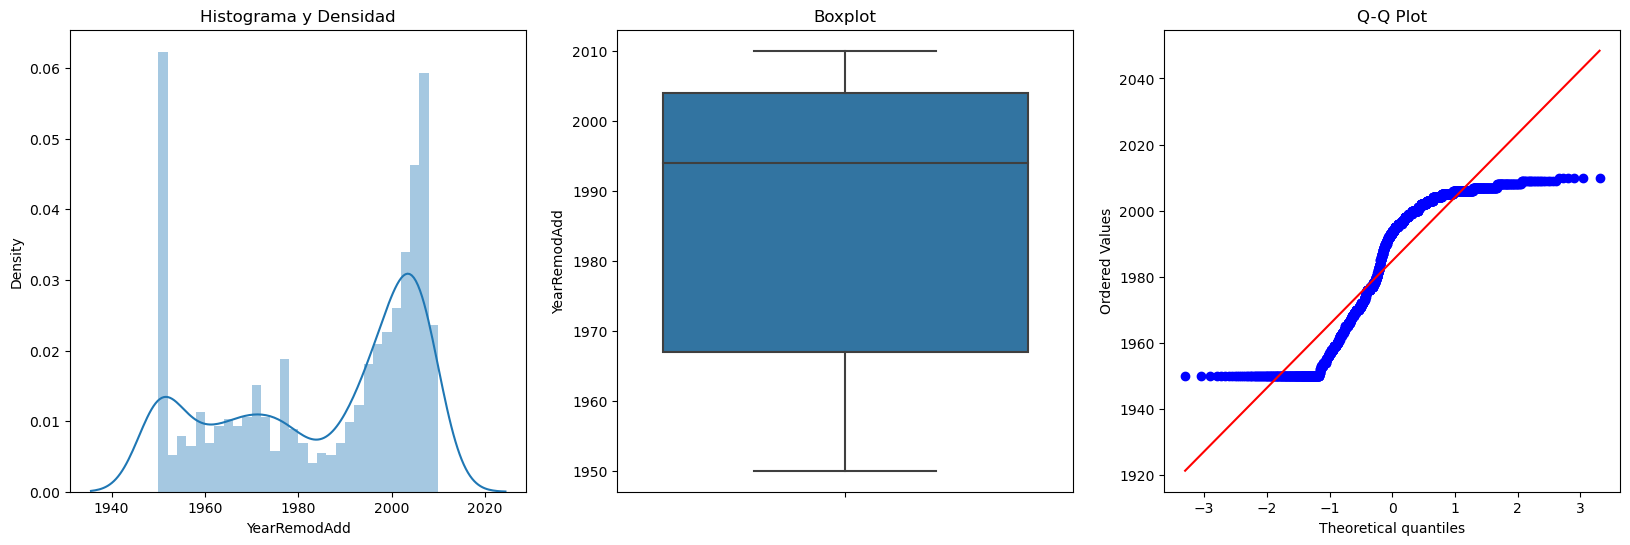

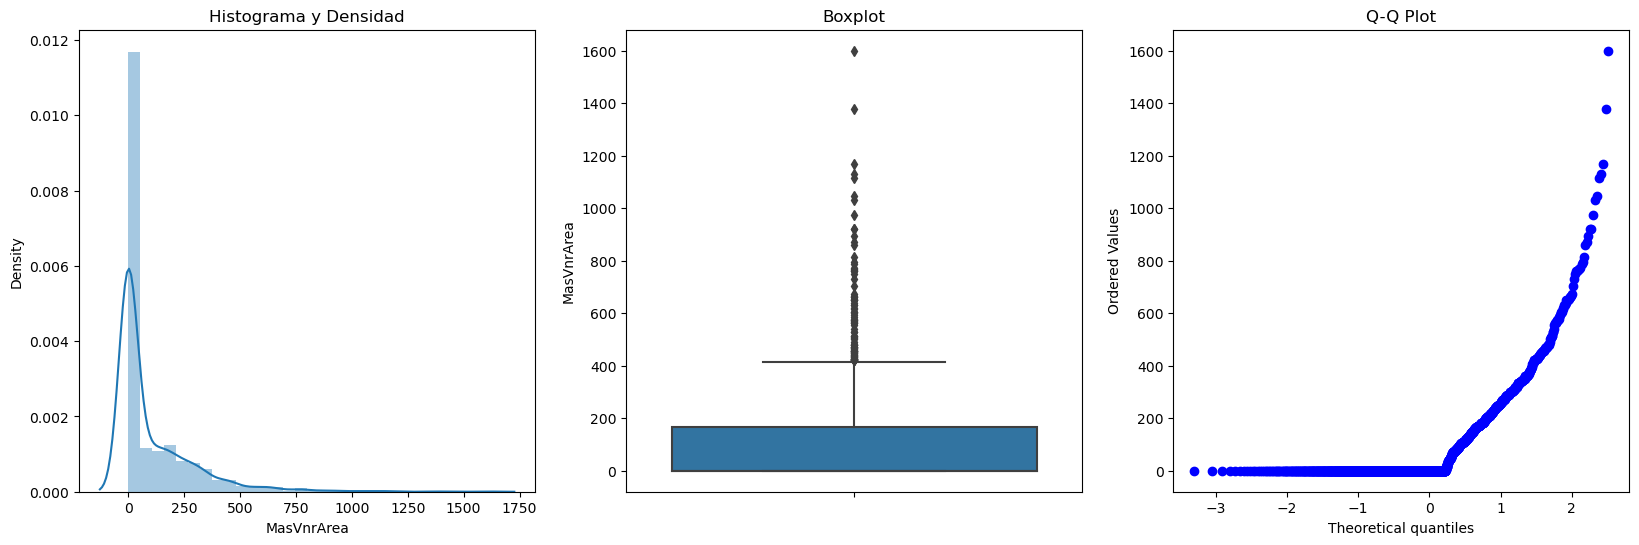

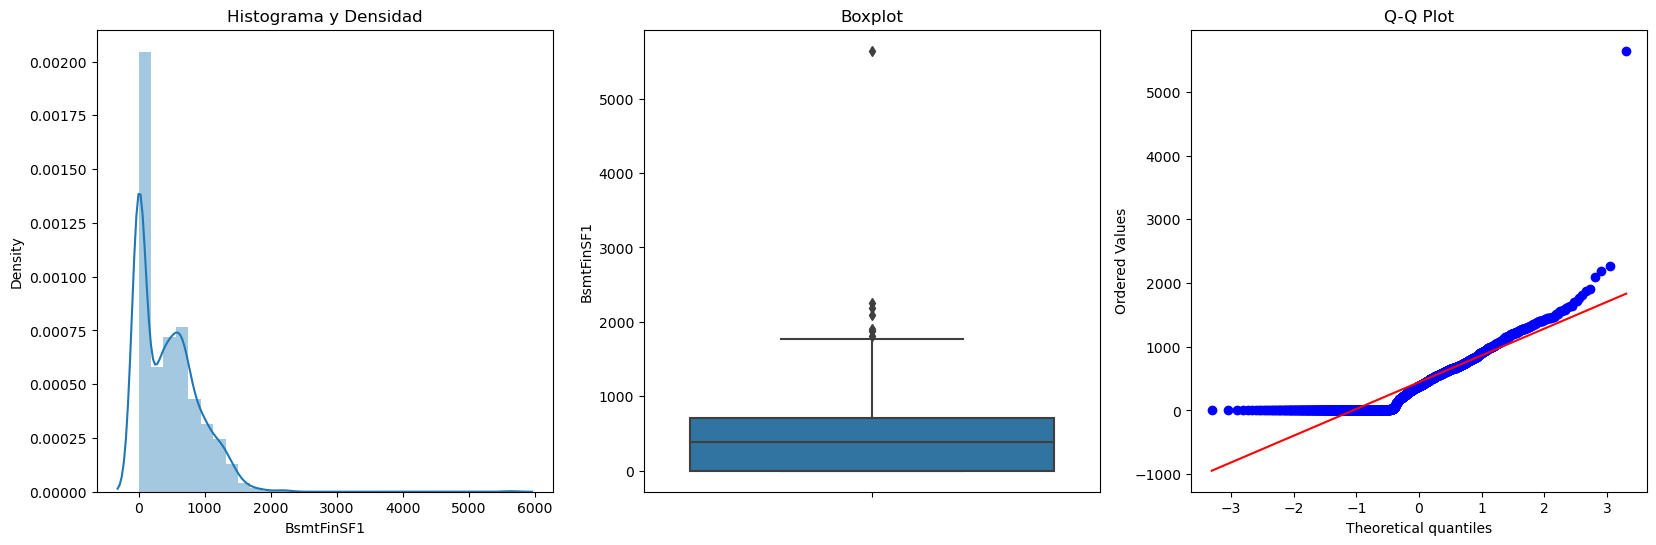

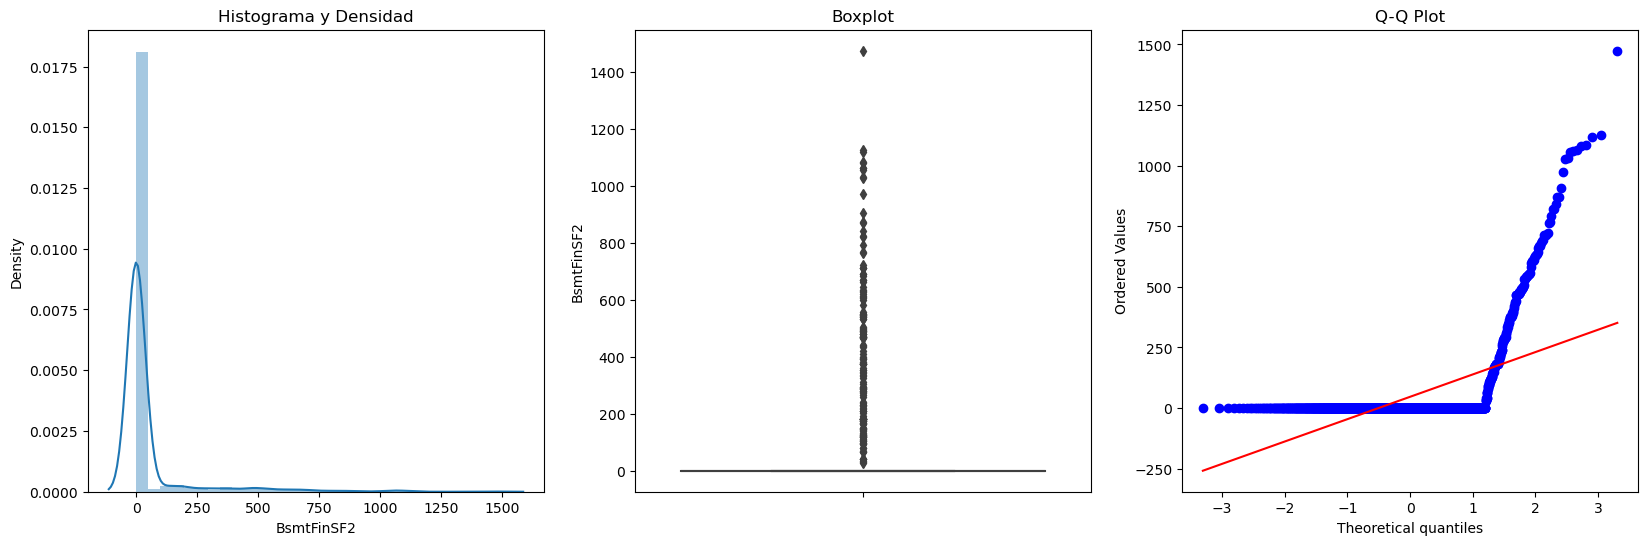

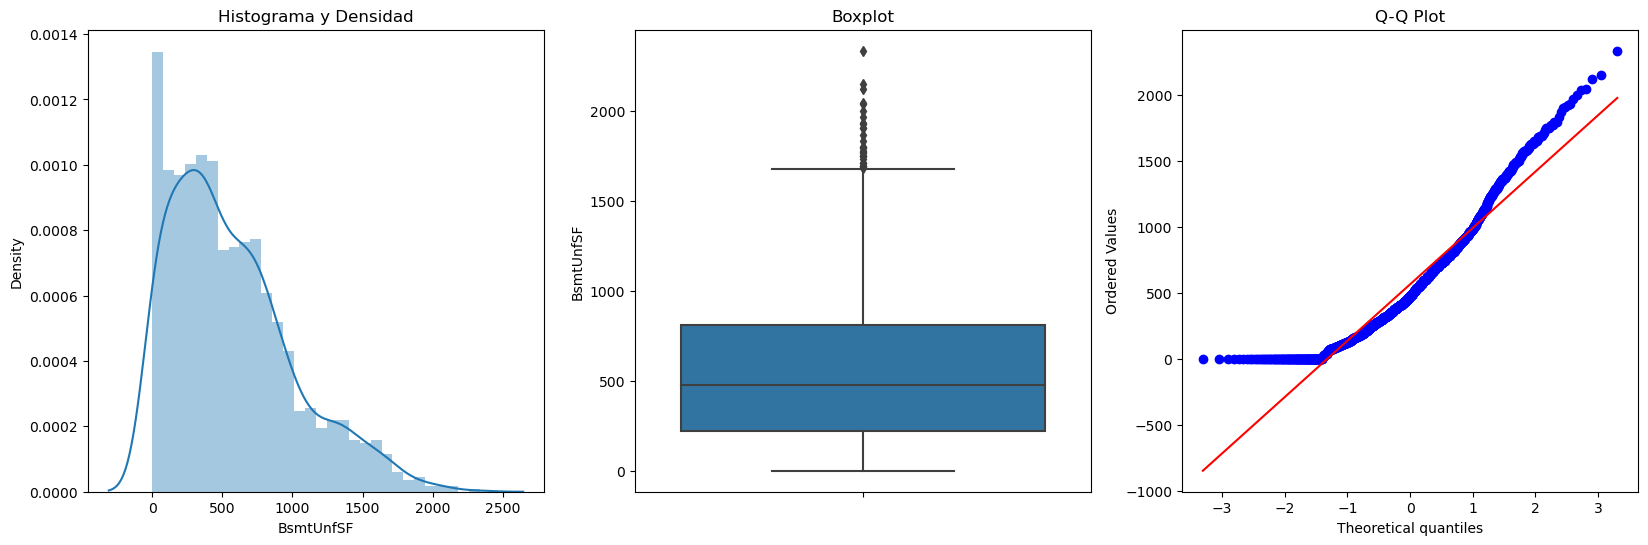

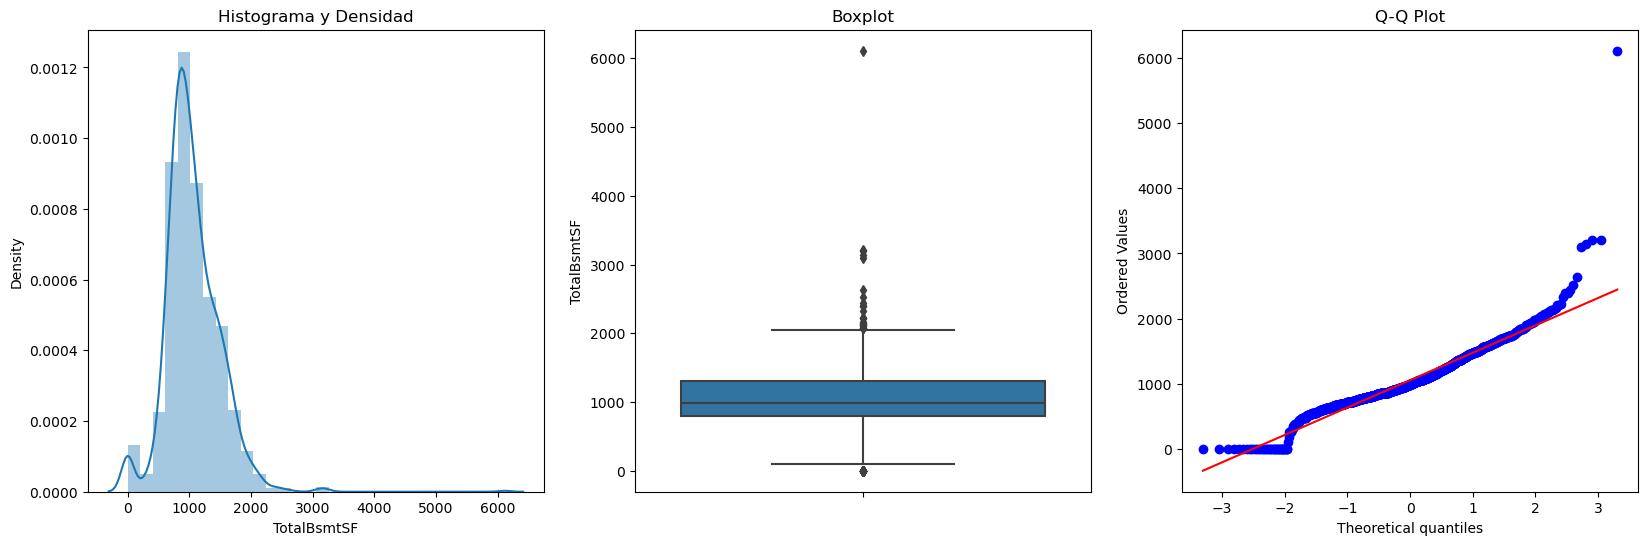

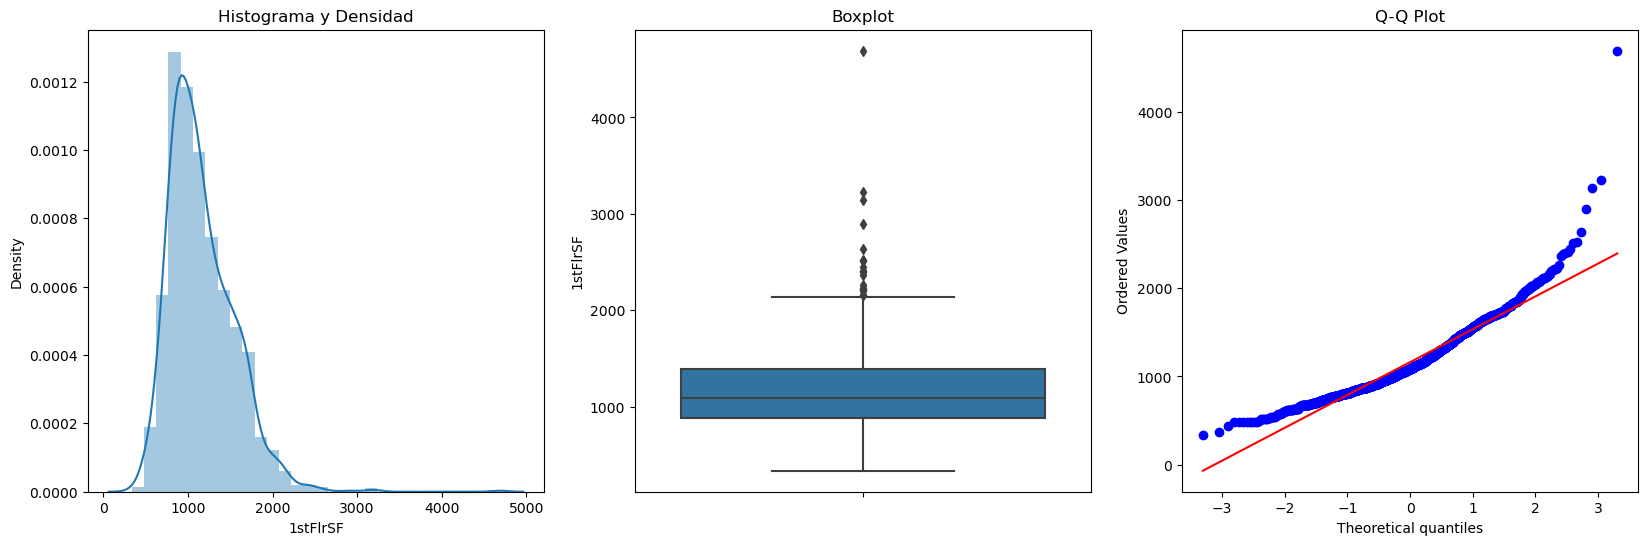

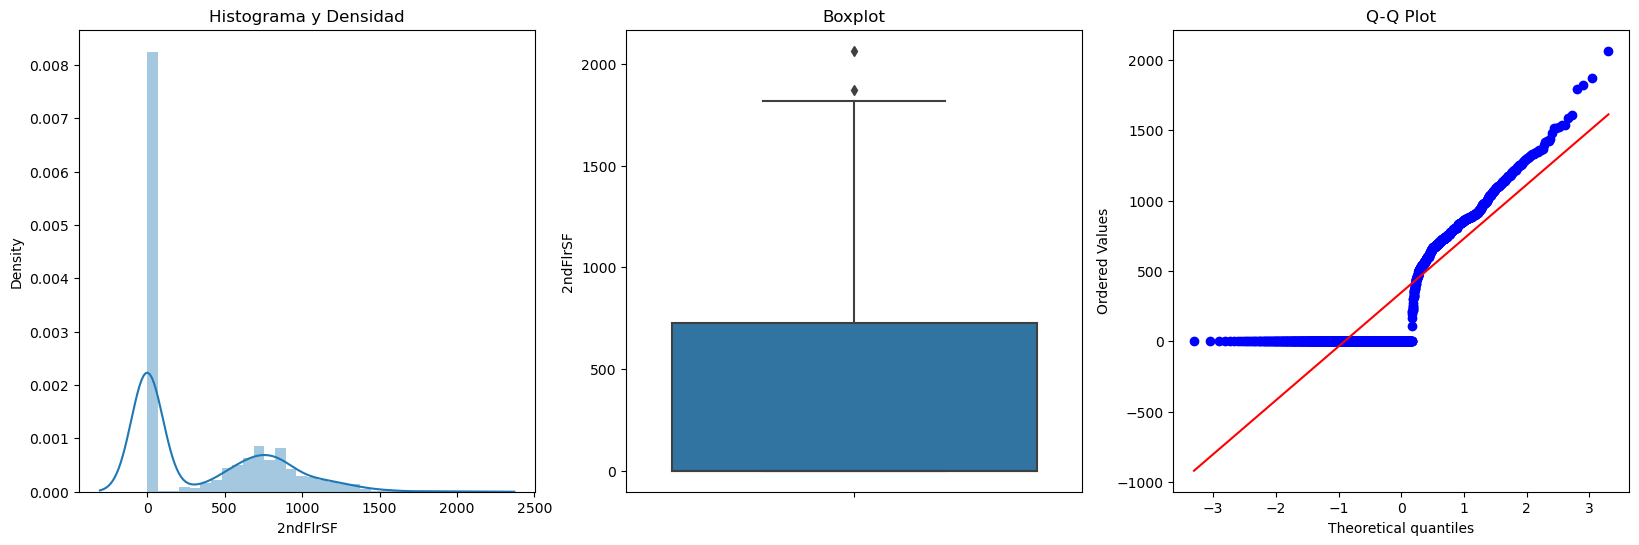

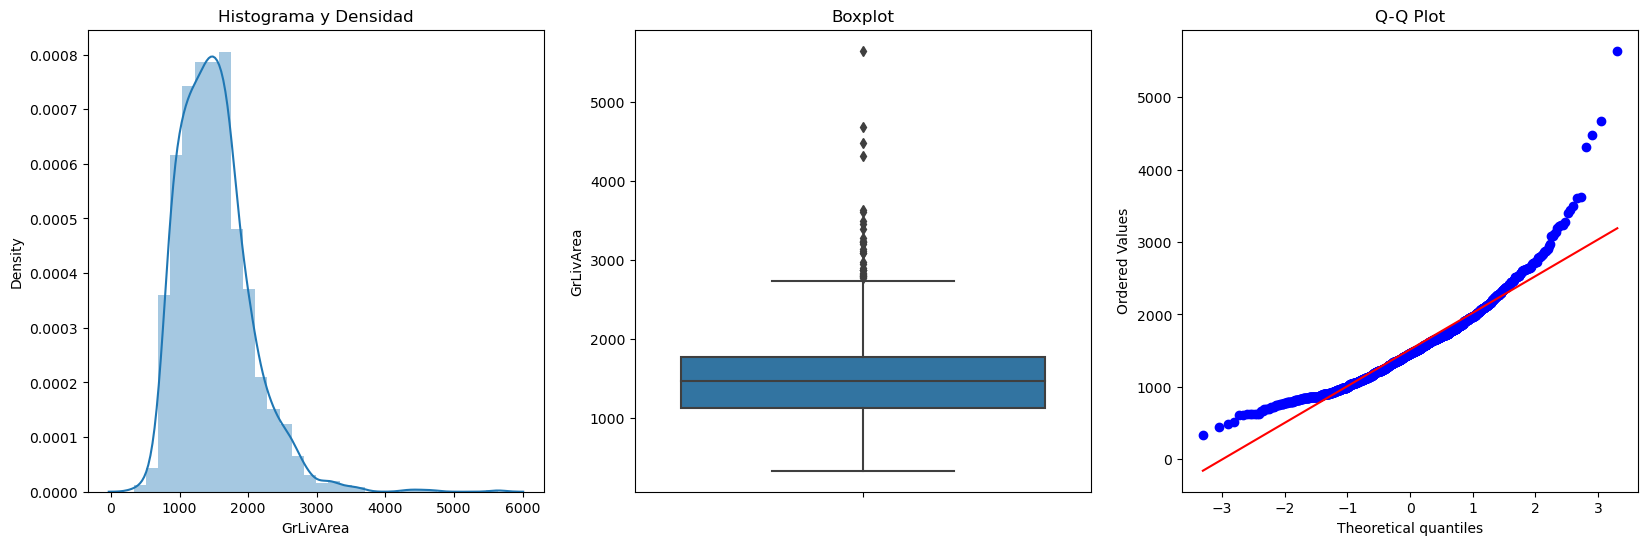

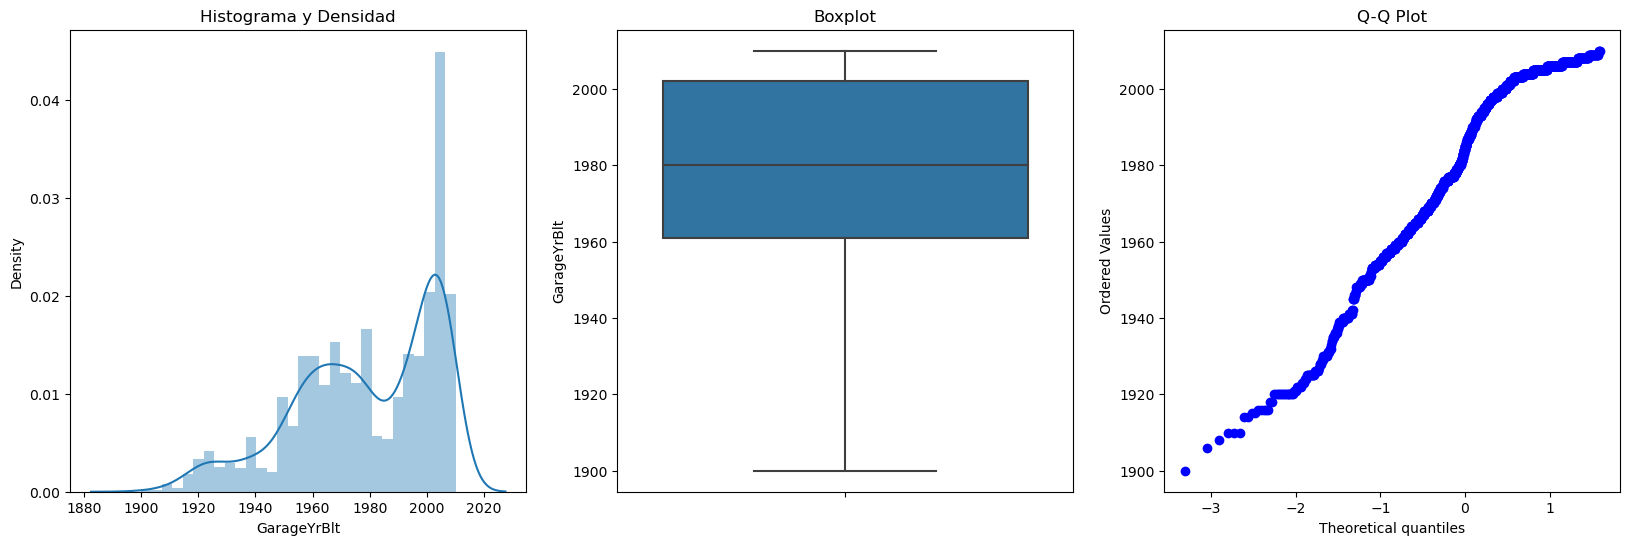

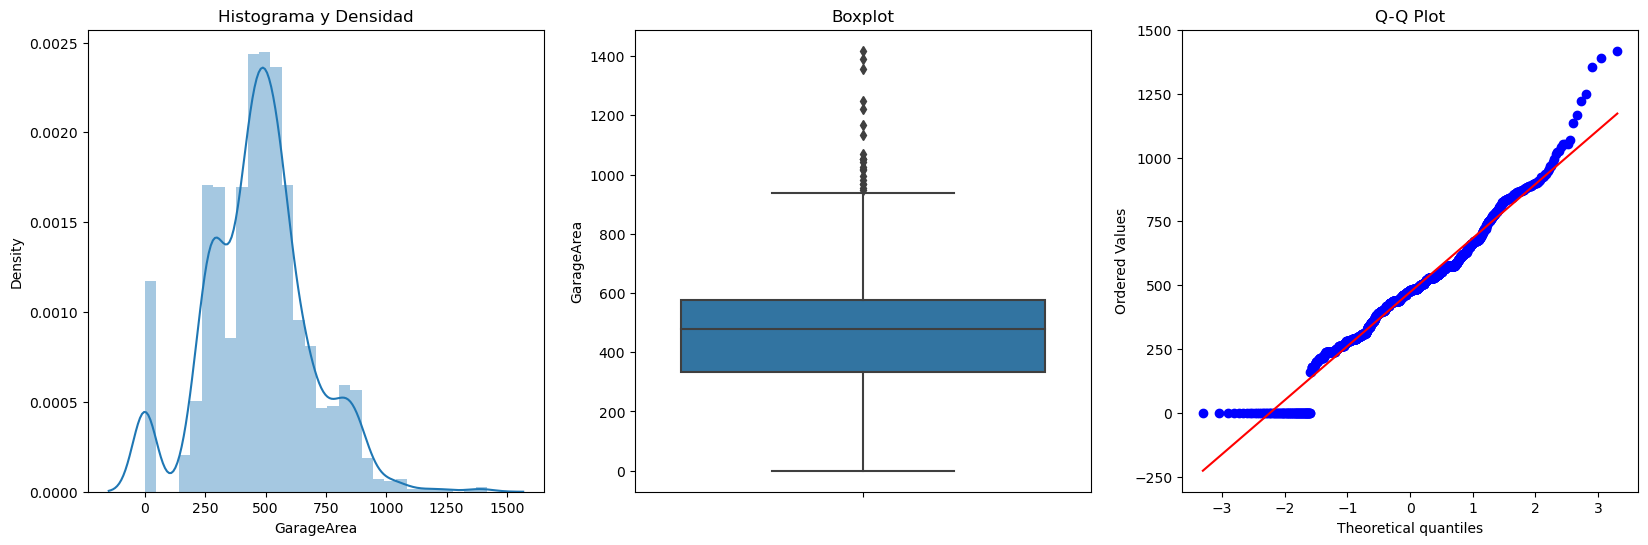

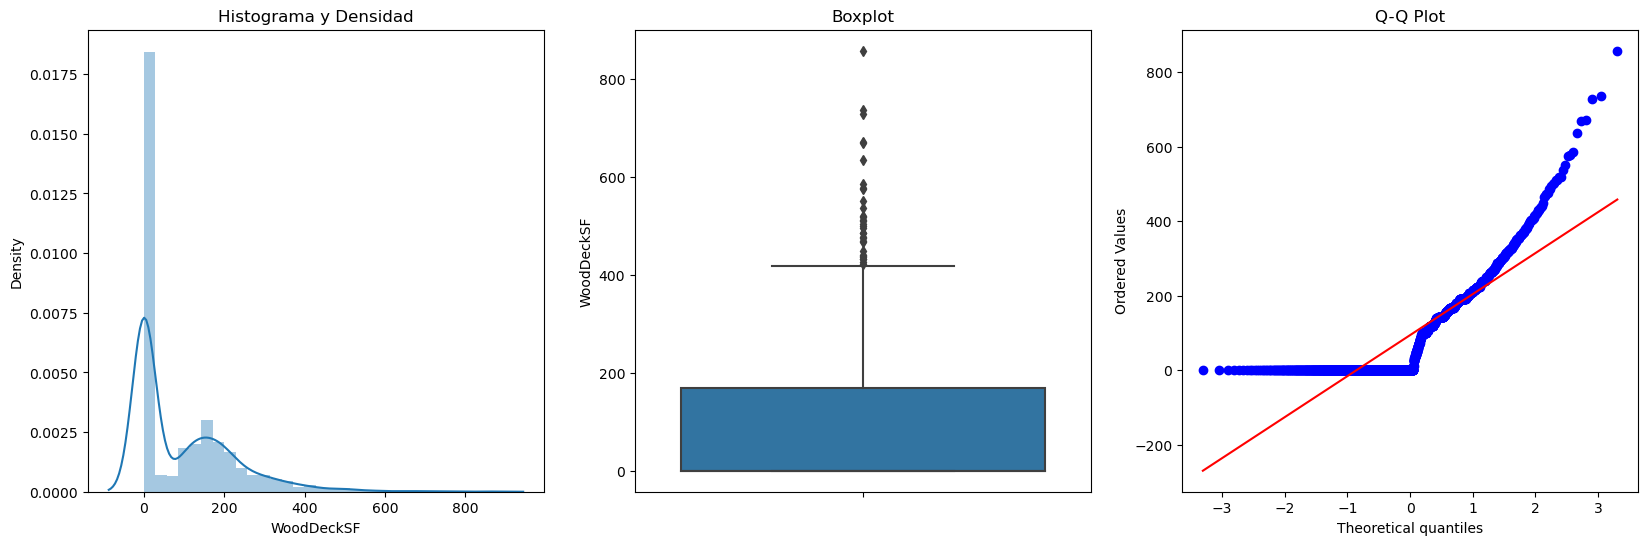

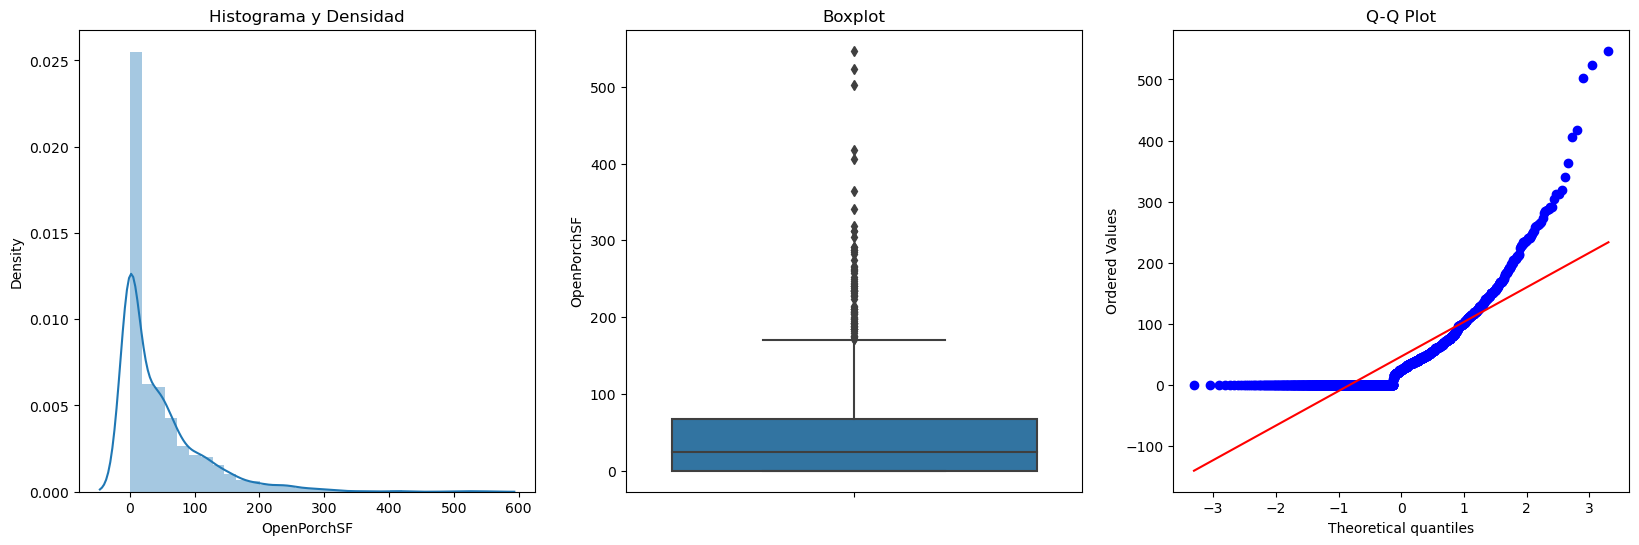

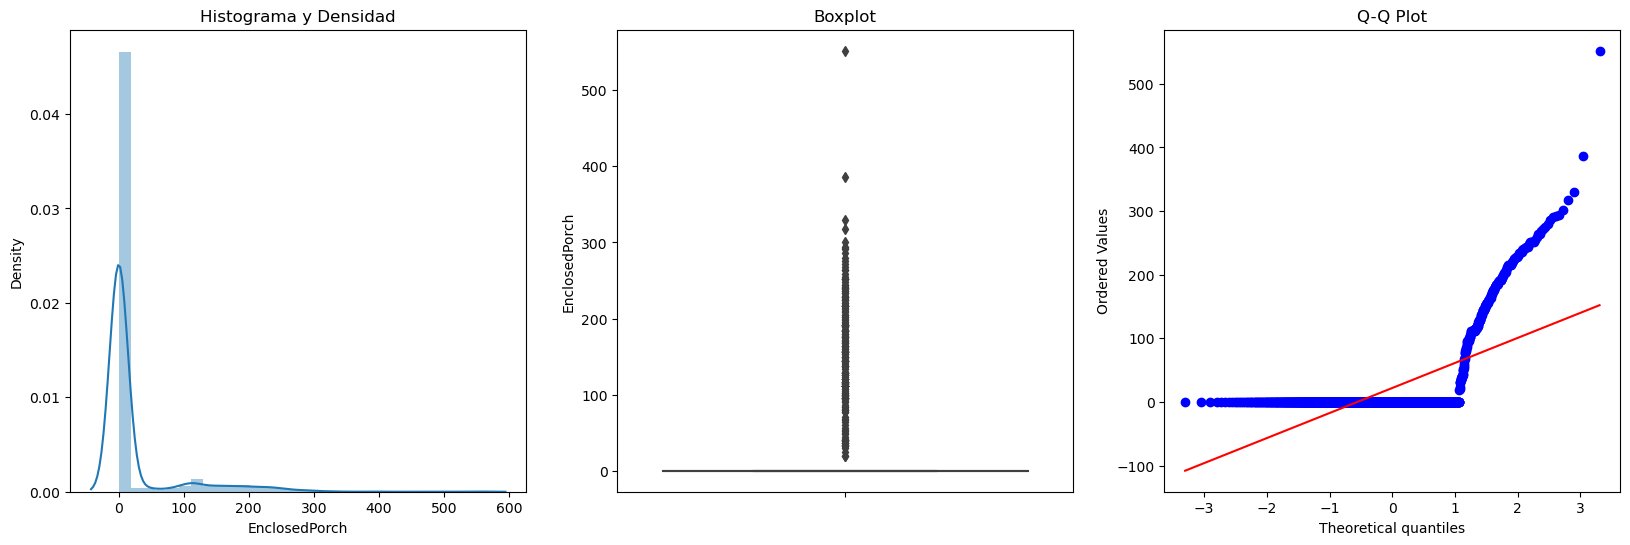

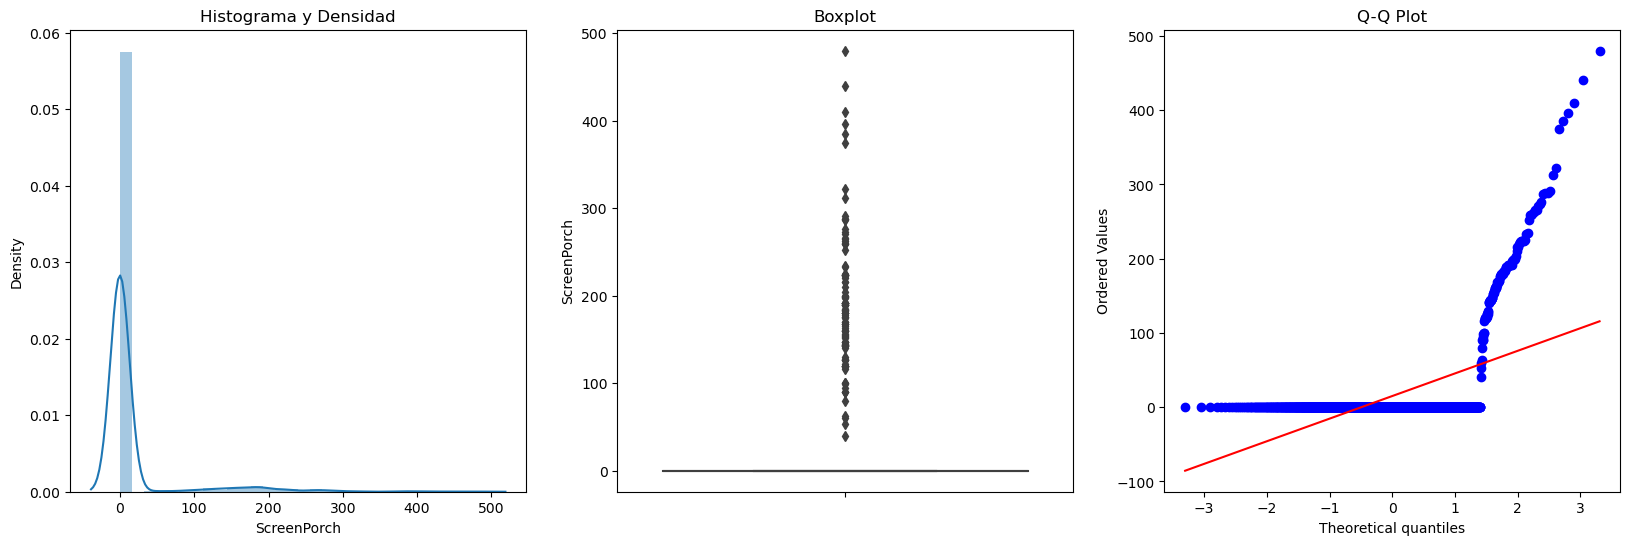

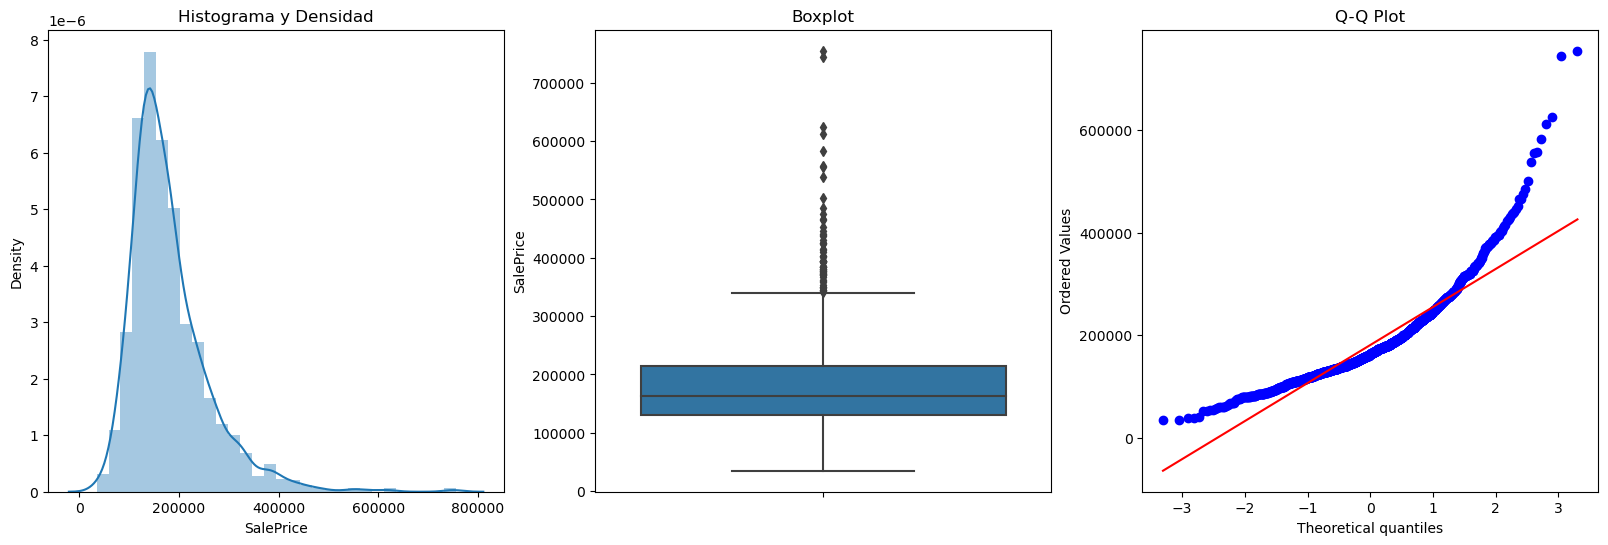

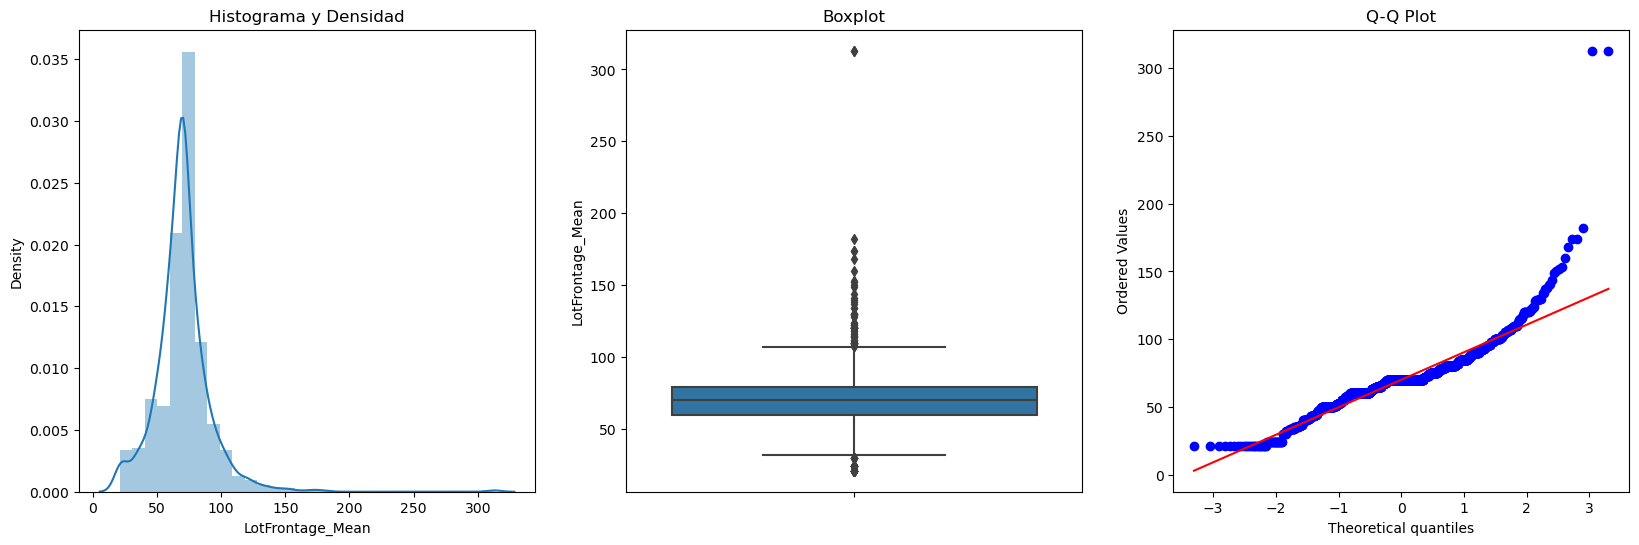

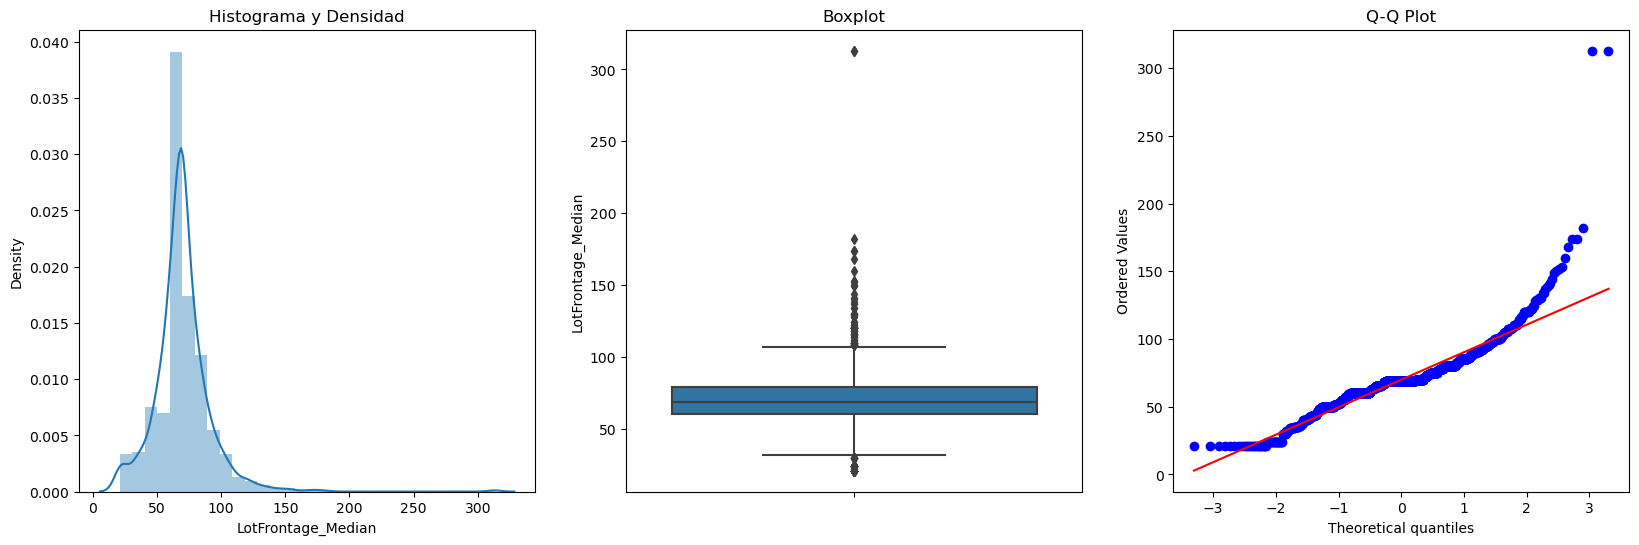

In [180]:
for col in continuas:
    plotDistBoxQQ(dataHP,col)

In [181]:
dataset= dataHP
col= 'LotArea'

IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
LI=dataset[col].quantile(0.25)-(IQR*1.75)
LS=dataset[col].quantile(0.75)+(IQR*1.75)

print(LI)
print(LS)

469.5
18685.5


In [182]:
dataset= dataHP
col= 'MSSubClass'

IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
LI=dataset[col].quantile(0.25)-(IQR*1.75)
LS=dataset[col].quantile(0.75)+(IQR*1.75)

print(LI)
print(LS)

-67.5
157.5


In [183]:
dataset= dataHP
col= 'TotalBsmtSF'

IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
LI=dataset[col].quantile(0.25)-(IQR*1.75)
LS=dataset[col].quantile(0.75)+(IQR*1.75)

print(LI)
print(LS)

-83.625
2177.625


In [184]:
dataset= dataHP
col= 'GrLivArea'

IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
LI=dataset[col].quantile(0.25)-(IQR*1.75)
LS=dataset[col].quantile(0.75)+(IQR*1.75)

print(LI)
print(LS)

-3.1875
2909.4375


In [185]:
dataset= dataHP
col= 'GarageArea'

IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
LI=dataset[col].quantile(0.25)-(IQR*1.75)
LS=dataset[col].quantile(0.75)+(IQR*1.75)

print(LI)
print(LS)

-88.125
998.625


In [186]:
dataset= dataHP
col= 'SalePrice'

IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
LI=dataset[col].quantile(0.25)-(IQR*1.75)
LS=dataset[col].quantile(0.75)+(IQR*1.75)

print(LI)
print(LS)

-17068.75
361043.75


In [187]:
###Descripción: Calcula los limites superiores e inferiores para detección de outliers.
###Input:dataset->pandas dataframe, col ->string nombre de columna 
###Output: tuplade floats con los limites superiores e inferiores
dataset= dataHP
col= 'LotArea'
def detectOutliersLimits(dataset,col):
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI= dataset[col].quantile(0.25)-(IQR*1.75)
    LS= dataset[col].quantile(0.75)+(IQR*1.75)

    return LI,LS

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


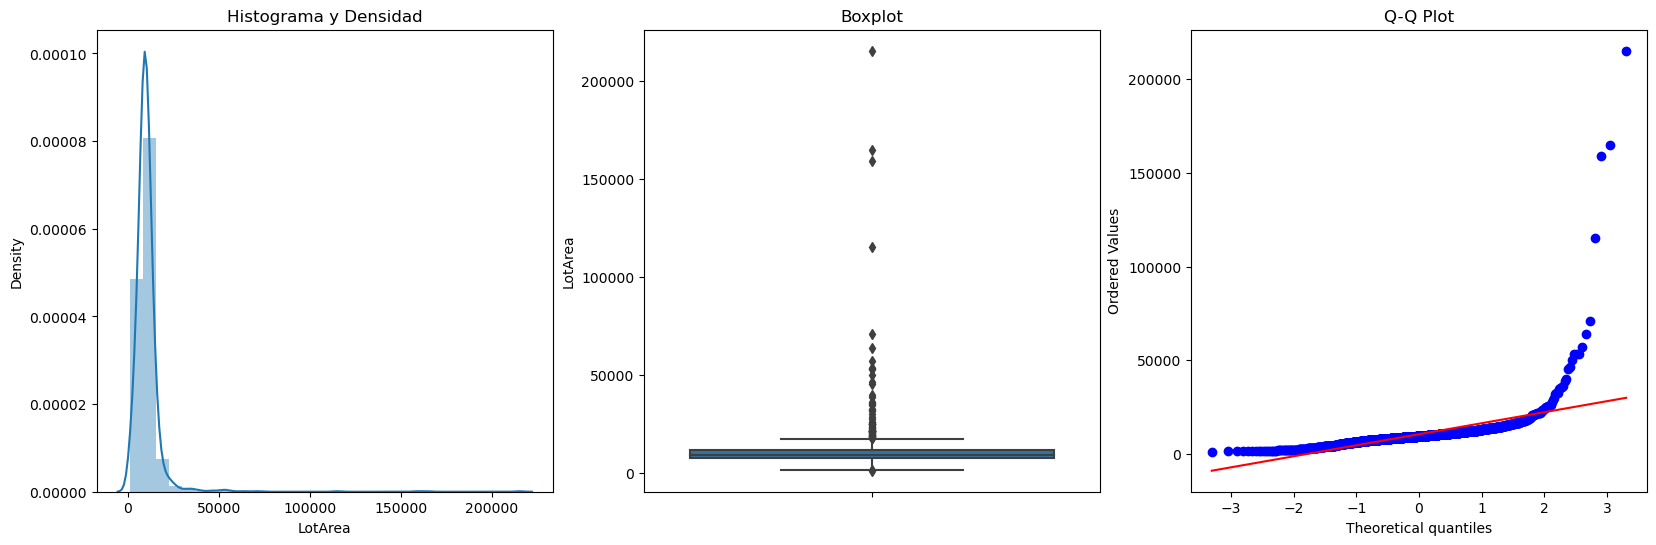

In [188]:
plotDistBoxQQ(dataHP,'LotArea')

In [189]:
LI, LS= detectOutliersLimits(dataHP,'LotArea')
dataHP['LotArea']=np.where(dataHP['LotArea']> LS,LS,
                          np.where(dataHP['LotArea']<LI, LI,dataHP['LotArea']))

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


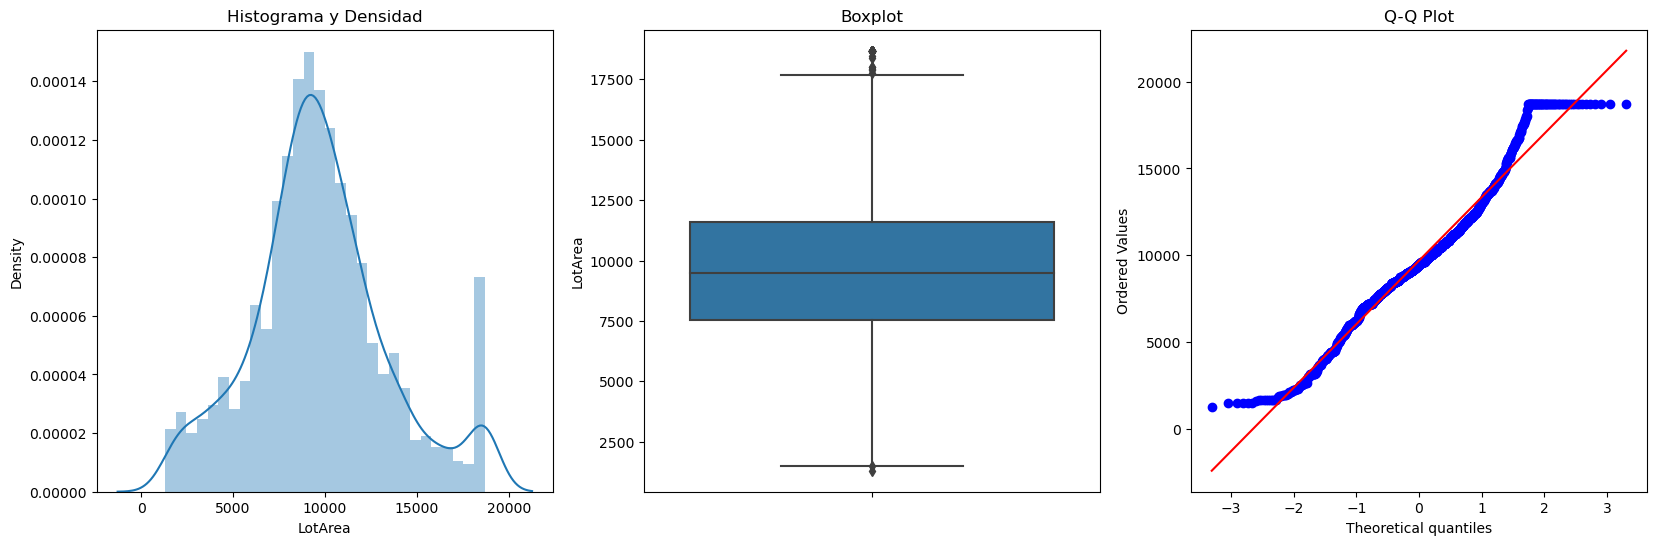

In [190]:
plotDistBoxQQ(dataHP,'LotArea')

In [195]:
dataset= dataHP
col= 'MSSubClass'
def detectOutliersLimits(dataset,col):
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI= dataset[col].quantile(0.25)-(IQR*1.75)
    LS= dataset[col].quantile(0.75)+(IQR*1.75)

    return LI,LS

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


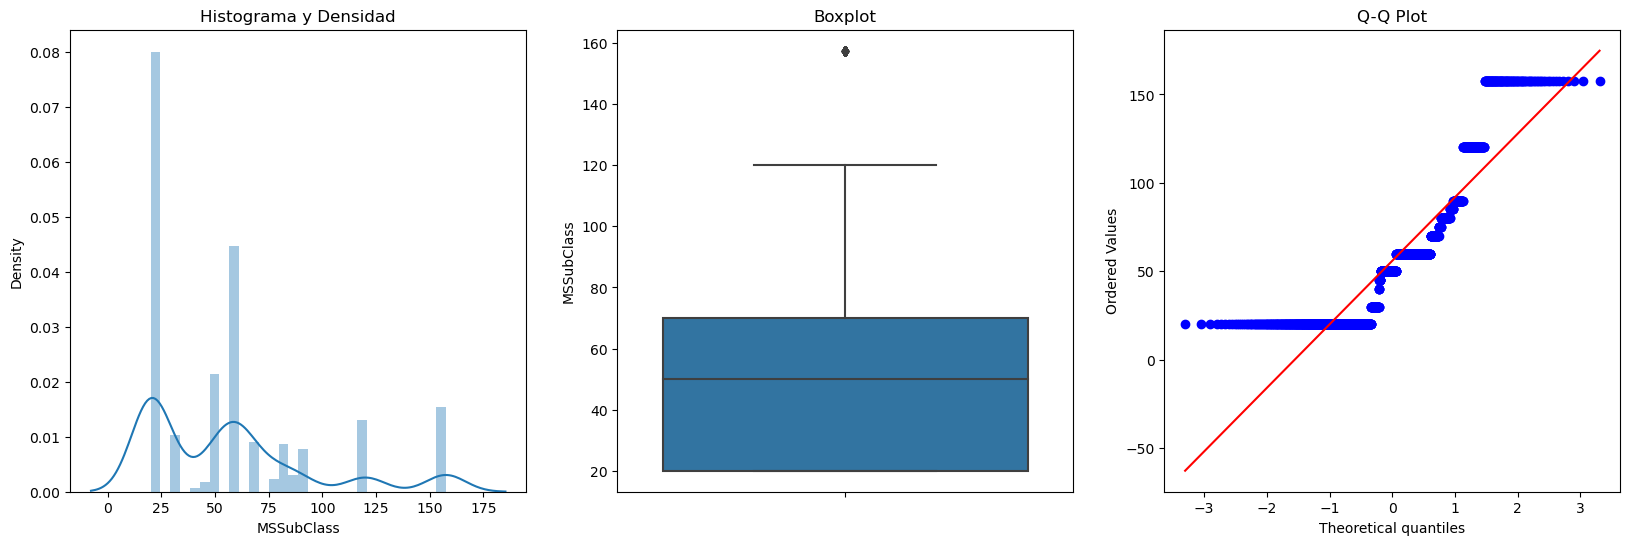

In [201]:
plotDistBoxQQ(dataHP,'MSSubClass')

In [202]:
LI, LS= detectOutliersLimits(dataHP,'MSSubClass')
dataHP['MSSubClass']=np.where(dataHP['MSSubClass']> LS,LS,
                          np.where(dataHP['MSSubClass']<LI, LI,dataHP['MSSubClass']))

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


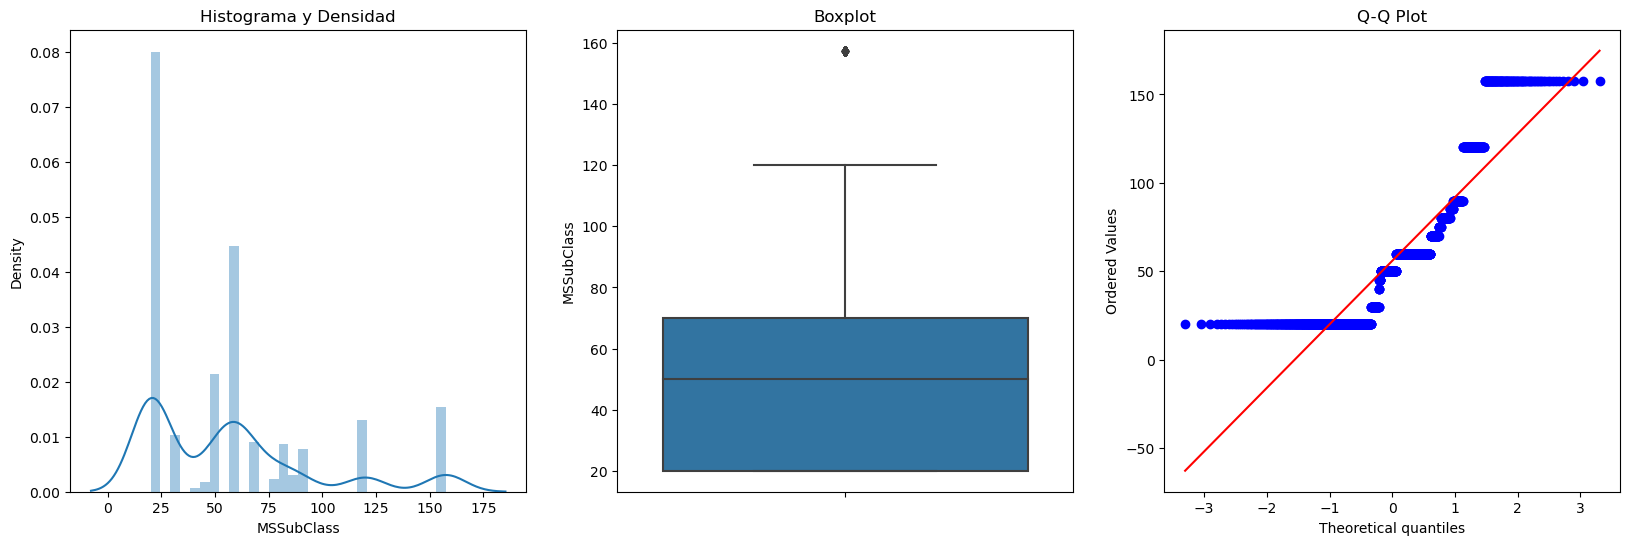

In [203]:
plotDistBoxQQ(dataHP,'MSSubClass')

In [204]:
dataset= dataHP
col= 'TotalBsmtSF'
def detectOutliersLimits(dataset,col):
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI= dataset[col].quantile(0.25)-(IQR*1.75)
    LS= dataset[col].quantile(0.75)+(IQR*1.75)

    return LI,LS

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


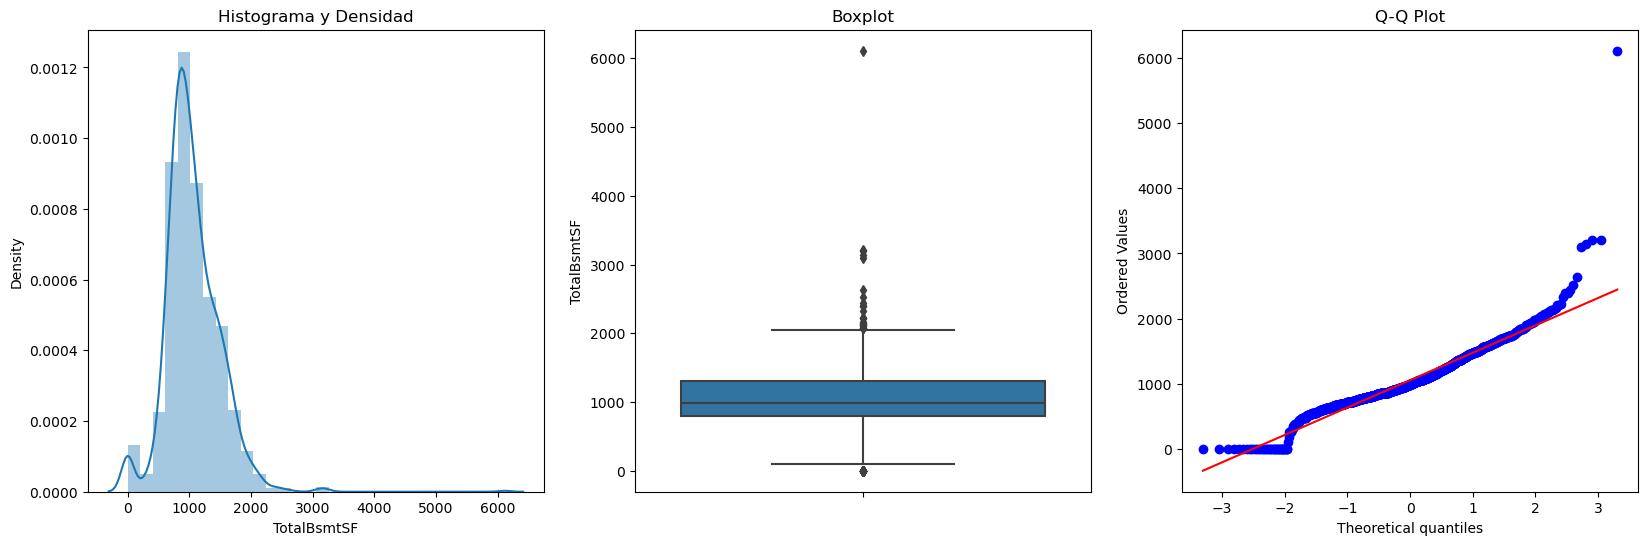

In [205]:
plotDistBoxQQ(dataHP,'TotalBsmtSF')

In [207]:
LI, LS= detectOutliersLimits(dataHP,'TotalBsmtSF')
dataHP['TotalBsmtSF']=np.where(dataHP['TotalBsmtSF']> LS,LS,
                          np.where(dataHP['TotalBsmtSF']<LI, LI,dataHP['TotalBsmtSF']))

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


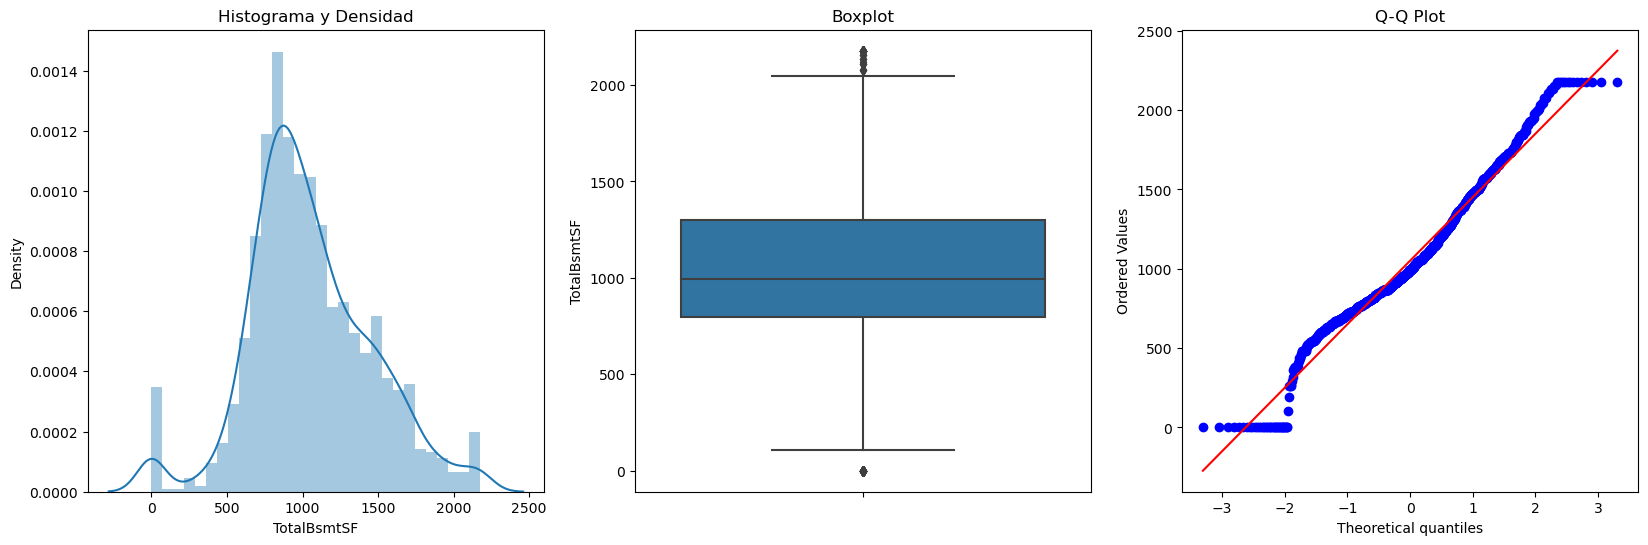

In [208]:
plotDistBoxQQ(dataHP,'TotalBsmtSF')

In [209]:
dataset= dataHP
col= 'GrLivArea'
def detectOutliersLimits(dataset,col):
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI= dataset[col].quantile(0.25)-(IQR*1.75)
    LS= dataset[col].quantile(0.75)+(IQR*1.75)

    return LI,LS

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


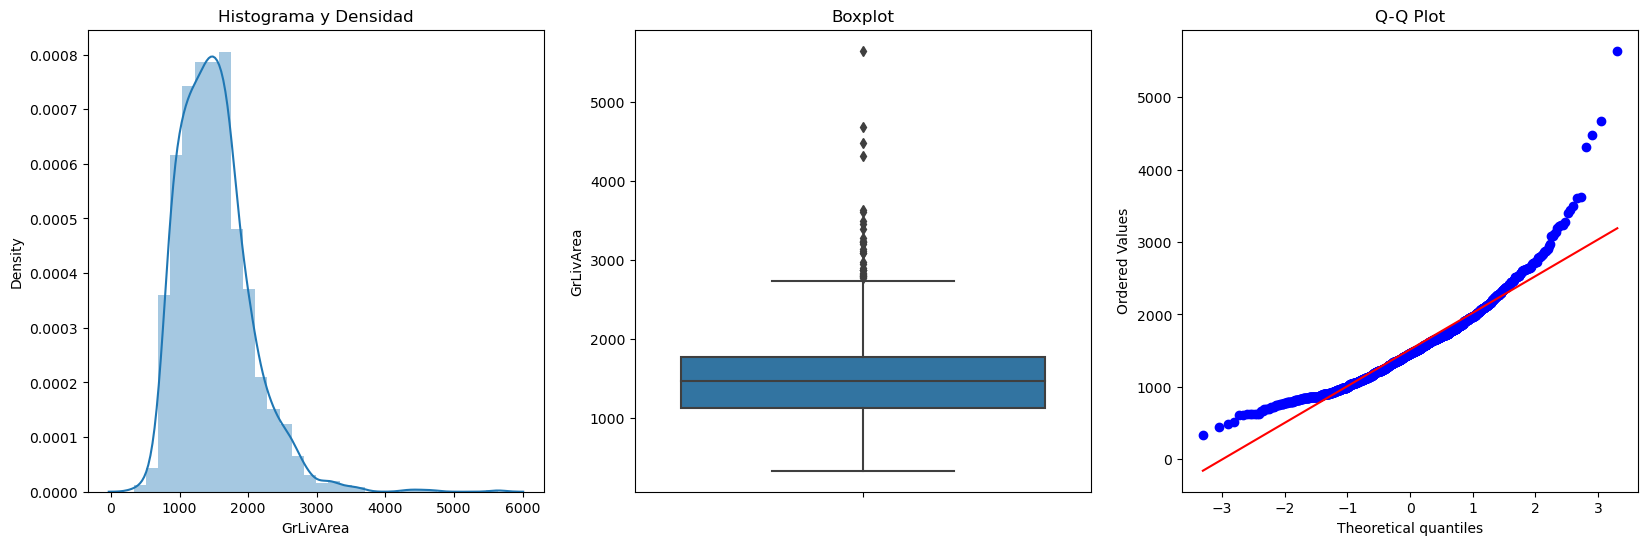

In [210]:
plotDistBoxQQ(dataHP,'GrLivArea')

In [211]:
LI, LS= detectOutliersLimits(dataHP,'GrLivArea')
dataHP['TotalBsmtSF']=np.where(dataHP['GrLivArea']> LS,LS,
                          np.where(dataHP['GrLivArea']<LI, LI,dataHP['GrLivArea']))

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


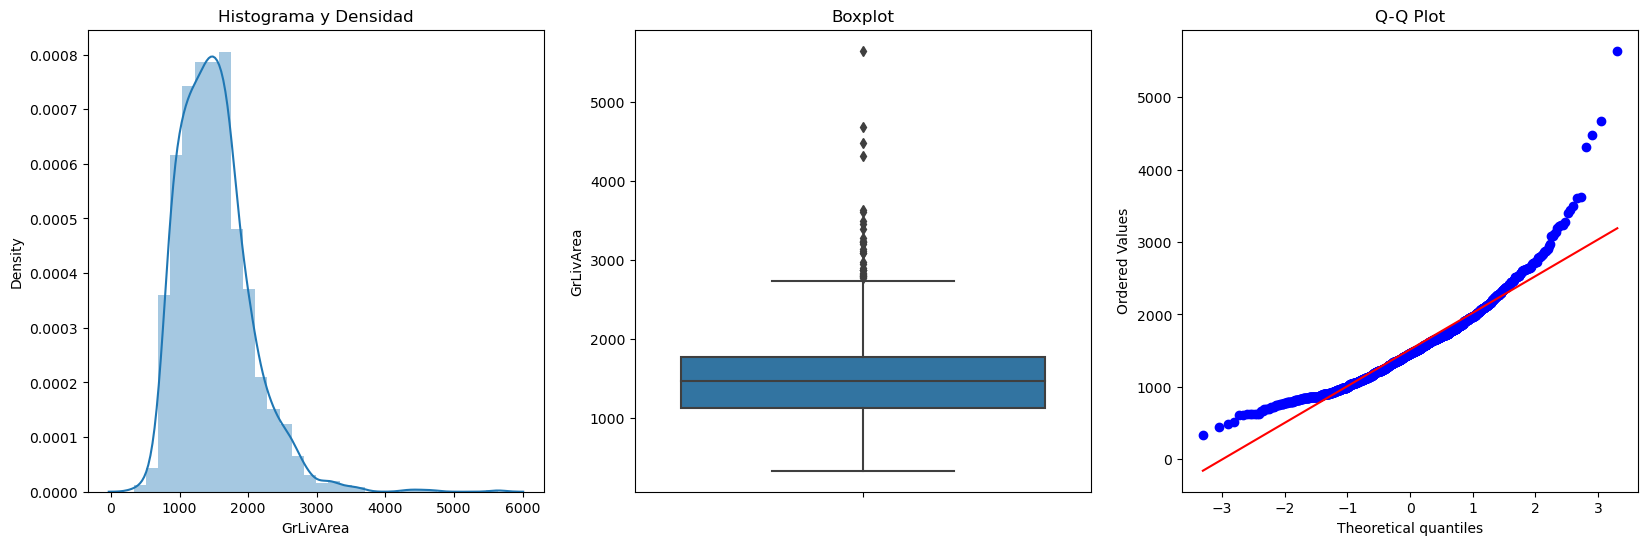

In [212]:
plotDistBoxQQ(dataHP,'GrLivArea')

In [213]:
dataset= dataHP
col= 'GarageArea'
def detectOutliersLimits(dataset,col):
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI= dataset[col].quantile(0.25)-(IQR*1.75)
    LS= dataset[col].quantile(0.75)+(IQR*1.75)

    return LI,LS

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


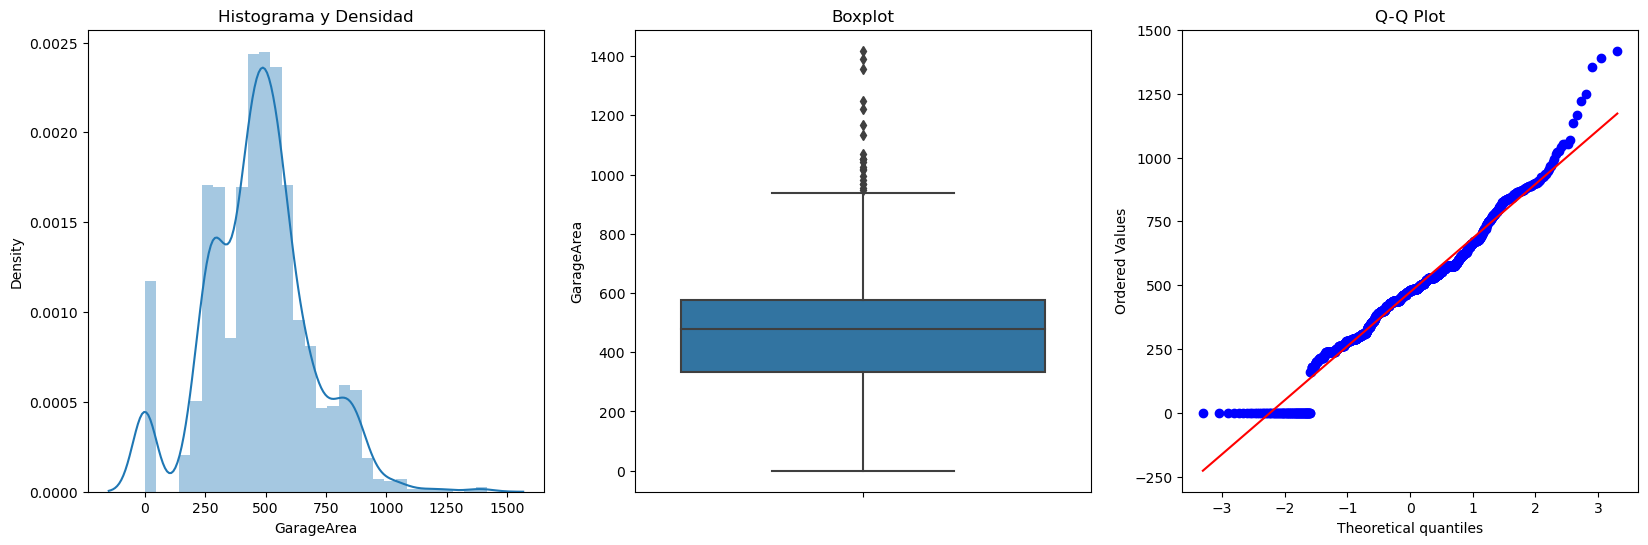

In [214]:
plotDistBoxQQ(dataHP,'GarageArea')

In [215]:
LI, LS= detectOutliersLimits(dataHP,'GarageArea')
dataHP['TotalBsmtSF']=np.where(dataHP['GarageArea']> LS,LS,
                          np.where(dataHP['GarageArea']<LI, LI,dataHP['GarageArea']))

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


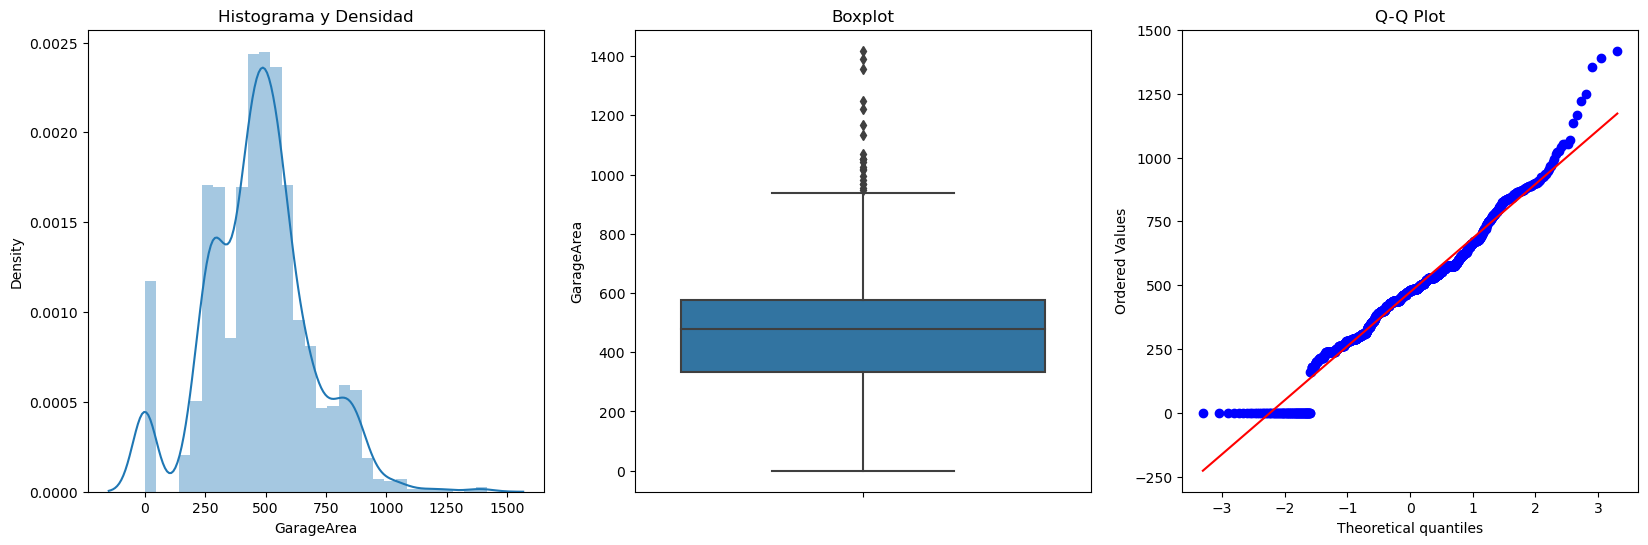

In [216]:
plotDistBoxQQ(dataHP,'GarageArea')

In [217]:
dataset= dataHP
col= 'SalePrice'
def detectOutliersLimits(dataset,col):
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI= dataset[col].quantile(0.25)-(IQR*1.75)
    LS= dataset[col].quantile(0.75)+(IQR*1.75)

    return LI,LS

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


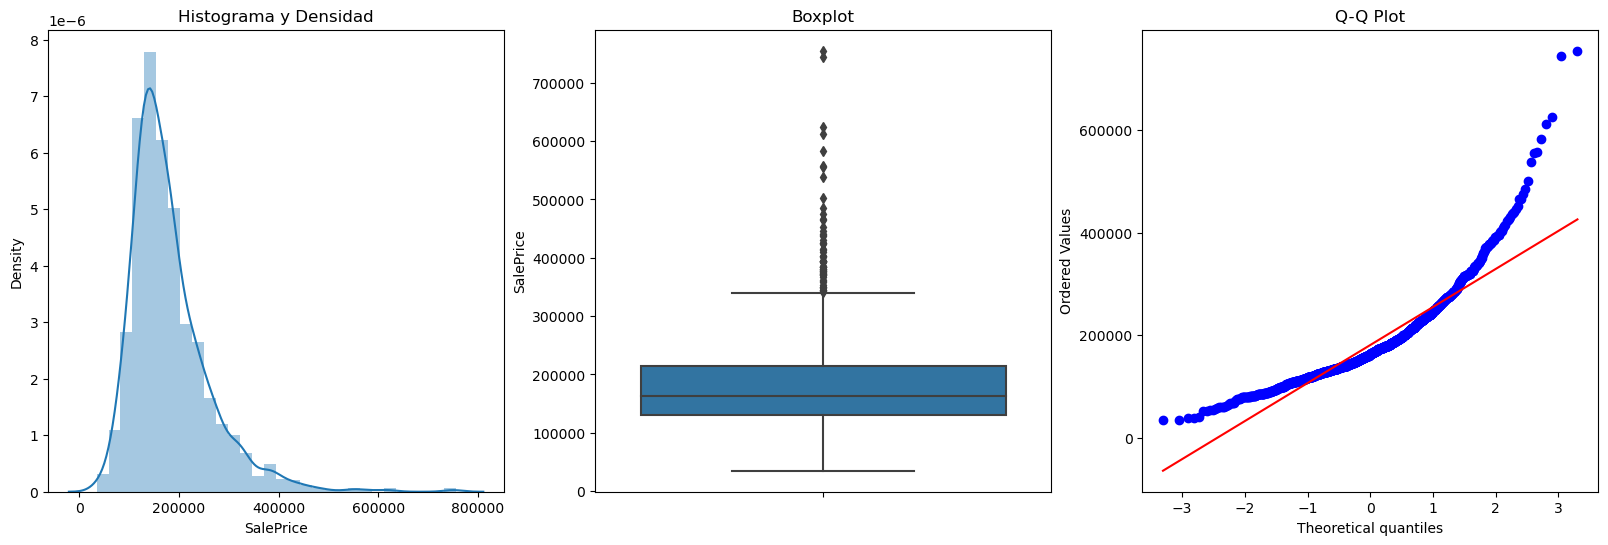

In [218]:
plotDistBoxQQ(dataHP,'SalePrice')

In [219]:
LI, LS= detectOutliersLimits(dataHP,'SalePrice')
dataHP['TotalBsmtSF']=np.where(dataHP['SalePrice']> LS,LS,
                          np.where(dataHP['SalePrice']<LI, LI,dataHP['SalePrice']))

C:\Users\ecris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


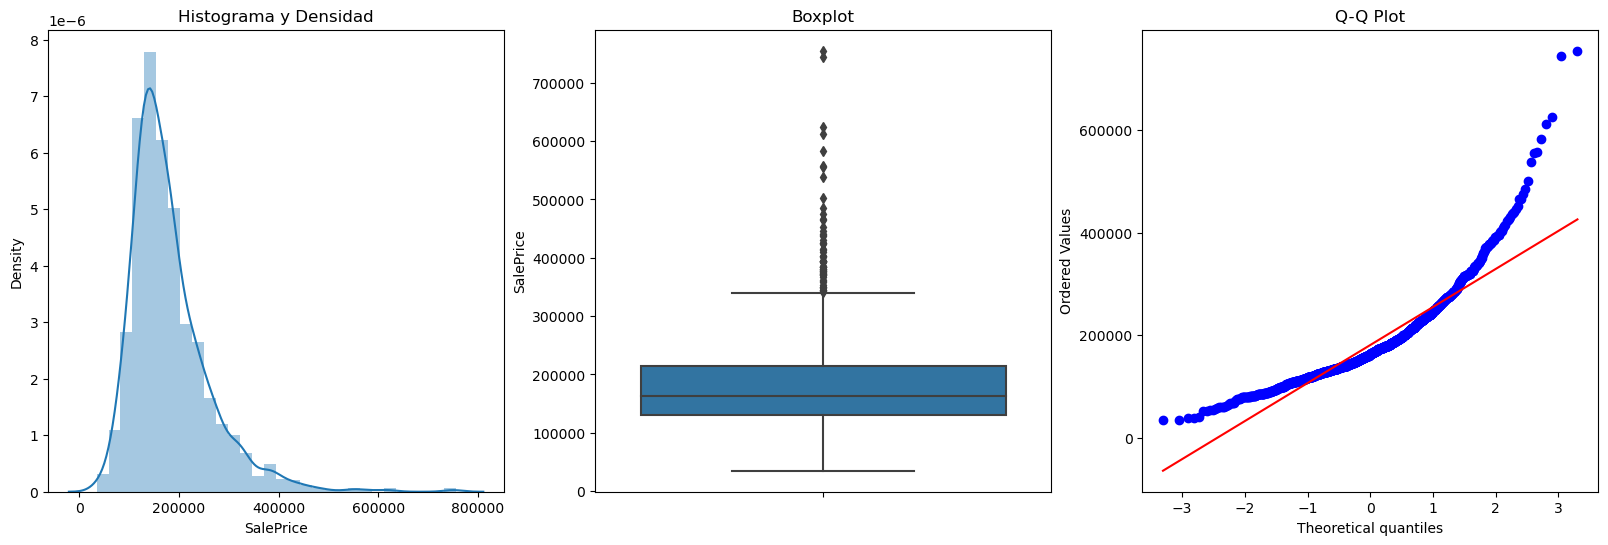

In [220]:
plotDistBoxQQ(dataHP,'SalePrice')